<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

<a id="top"></a>
[Back to report](#bottom)

In [1]:
# import the packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for Q-Q plots
import scipy.stats as stats

# to split the datasets
from sklearn.model_selection import train_test_split

# to impute missing data
from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

# for encoding using feature-engine
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import OrdinalEncoder

from feature_engine.transformation import PowerTransformer

# for discretization
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Step 1: Load and Explore the Data

In [2]:
# load the dataset
circuits = pd.read_csv('./datasets/f1db_csv_mod/circuits_mod.csv')
circuits.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [3]:
constructor_r = pd.read_csv('./datasets/f1db_csv_mod/constructor_results_mod.csv')
constructor_r.head()

constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N

In [4]:
constructor_s = pd.read_csv('./datasets/f1db_csv_mod/constructor_standings_mod.csv')
constructor_s.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [5]:
constructors = pd.read_csv('./datasets/f1db_csv_mod/constructors_mod.csv')
constructors.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [6]:
driver_s = pd.read_csv('./datasets/f1db_csv_mod/driver_standings_mod.csv')
driver_s.head()

driverStandingsId  raceId  driverId points  position positionText  wins
0                  1      18         1     10         1            1     1
1                  2      18         2      8         2            2     0
2                  3      18         3      6         3            3     0
3                  4      18         4      5         4            4     0
4                  5      18         5      4         5            5     0

In [7]:
drivers = pd.read_csv('./datasets/f1db_csv_mod/drivers_mod.csv')
drivers.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [8]:
lap = pd.read_csv('./datasets/f1db_csv_mod/lap_times_mod.csv')
lap.head()

raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342

In [9]:
pit = pd.read_csv('./datasets/f1db_csv_mod/pit_stops_mod.csv')
pit.head()

raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842

In [10]:
qualifying = pd.read_csv('./datasets/f1db_csv_mod/qualifying_mod.csv')
qualifying.head()

qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236

In [11]:
races = pd.read_csv('./datasets/f1db_csv_mod/races_mod.csv')
races.head()

raceId  round  circuitId                   name       date      time  \
0       1      1          1  Australian Grand Prix  3/29/2009   6:00:00   
1       2      2          2   Malaysian Grand Prix  4/5/12009   9:00:00   
2       3      3         17     Chinese Grand Prix  4/19/2009   7:00:00   
3       4      4          3     Bahrain Grand Prix  4/26/2009  12:00:00   
4       5      5          4     Spanish Grand Prix  5/10/2009  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [12]:
results = pd.read_csv('./datasets/f1db_csv_mod/results_mod.csv')
results.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps     time milliseconds fastestLap  \
0            1              1    10.0    58  34:50.6      5690616         39   
1            2              2     8.0    58    5.478      5696094         41   
2            3              3     6.0    58    8.163      5698779         41   
3            4              4     5.0    58   17.181      5707797         58   
4            5              5     4.0    58   18.014      5708630         43   

  rank fastestLapTime fastestLapSpeed  statusId  
0    2        01:27.5           218.3         1  
1    3        01:27.7         217.586         1  
2    5        01:28.1         216.719         1  
3    7        01:28.6         215.464         1  
4    1        01:27.4         218.385         1

In [13]:
seasons = pd.read_csv('./datasets/f1db_csv_mod/seasons_mod.csv')
seasons.head()

year                                                url
0  2009  https://en.wikipedia.org/wiki/2009_Formula_One...
1  2008  https://en.wikipedia.org/wiki/2008_Formula_One...
2  2007  https://en.wikipedia.org/wiki/2007_Formula_One...
3  2006  https://en.wikipedia.org/wiki/2006_Formula_One...
4  2005  https://en.wikipedia.org/wiki/2005_Formula_One...

In [14]:
status = pd.read_csv('./datasets/f1db_csv_mod/status_mod.csv')
status.head()

statusId        status
0         1      Finished
1         2  Disqualified
2         3      Accident
3         4     Collision
4         5        Engine

## Step 2: Data Wrangling on multiple tables 

In [15]:
df = pd.merge(results, races[['raceId', 'date', 'name', 'round']], on='raceId', how='left')
df = pd.merge(df, drivers[['driverId', 'forename', 'surname', 'dob', 'nationality']], on='driverId', how='left')
df = pd.merge(df, pit[['raceId', 'driverId', 'duration']], on=['raceId','driverId'], how='left')
df = pd.merge(df, constructors[['constructorId', 'name']], on='constructorId', how='left')
df = pd.merge(df, qualifying[['raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3']], on=['raceId', 'driverId', 'constructorId'], how='left')
df = pd.merge(df, status[['statusId', 'status']], on='statusId', how='left')

In [16]:
df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  ...  forename     surname         dob  \
0            1              1    10.0  ...     Lewis    Hamilton  1985-01-07   
1            2              2     8.0  ...      Nick    Heidfeld  1977-05-10   
2            3              3     6.0  ...      Nico     Rosberg  1985-06-27   
3            4              4     5.0  ...  Fernando      Alonso  1981-07-29   
4            5              5     4.0  ...    Heikki  Kovalainen  1981-10-19   

  nationality duration      name_y        q1        q2        q3    status  
0     British      NaN     McLaren  1:26.572  1:25.187  1:26.714  Finished  
1      German      NaN  BMW Sauber  1:25.960  1:25.518  1:27.236  Finished  
2      German      NaN    Williams  1:26.295  1:26.059  1:28.687  Finished  
3     Spanish      NaN     Renault  1:26.907  1:26.188        \N  Finished  
4     Finnish      NaN     McLaren  1:25.664  1:25.452  1:27.079  Finished  

[5 rows x 31 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29936 entries, 0 to 29935
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         29936 non-null  int64  
 1   raceId           29936 non-null  int64  
 2   driverId         29936 non-null  int64  
 3   constructorId    29936 non-null  int64  
 4   number           29936 non-null  object 
 5   grid             29936 non-null  int64  
 6   position         29936 non-null  object 
 7   positionText     29936 non-null  object 
 8   positionOrder    29936 non-null  int64  
 9   points           29936 non-null  float64
 10  laps             29936 non-null  int64  
 11  time             29936 non-null  object 
 12  milliseconds     29936 non-null  object 
 13  fastestLap       29936 non-null  object 
 14  rank             29936 non-null  object 
 15  fastestLapTime   29936 non-null  object 
 16  fastestLapSpeed  29936 non-null  object 
 17  statusId    

In [18]:
df.shape

(29936, 31)

In [19]:
# create a copy of the dataframe
df_bkup = df.copy()

In [20]:
df.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 0
grid                   0
position               0
positionText           0
positionOrder          0
points                 0
laps                   0
time                   0
milliseconds           0
fastestLap             0
rank                   0
fastestLapTime         0
fastestLapSpeed        0
statusId               0
date                 358
name_x                 0
round                  0
forename               0
surname                0
dob                    0
nationality            0
duration           21108
name_y                 0
q1                 16311
q2                 16519
q3                 16710
status                 0
dtype: int64

duration           0.705104
q3                 0.558191
q2                 0.551811
q1                 0.544862
date               0.011959
resultId           0.000000
fastestLapSpeed    0.000000
name_y             0.000000
nationality        0.000000
dob                0.000000
surname            0.000000
forename           0.000000
round              0.000000
name_x             0.000000
statusId           0.000000
fastestLapTime     0.000000
raceId             0.000000
rank               0.000000
fastestLap         0.000000
milliseconds       0.000000
time               0.000000
laps               0.000000
points             0.000000
positionOrder      0.000000
positionText       0.000000
position           0.000000
grid               0.000000
number             0.000000
constructorId      0.000000
driverId           0.000000
status             0.000000
dtype: float64


Text(0.5, 1.0, 'Quantifying missing data')

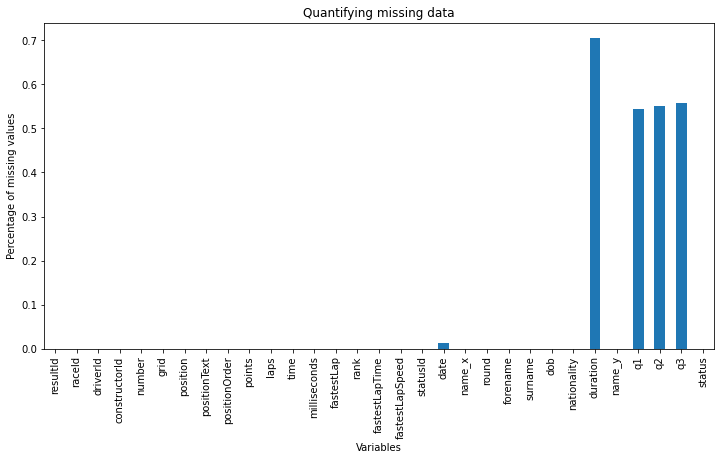

In [21]:
# to visualise the percentage of missing values for each variable
print(df.isnull().mean().sort_values(ascending=False))

# visualise the percentage of missing values for each variable
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

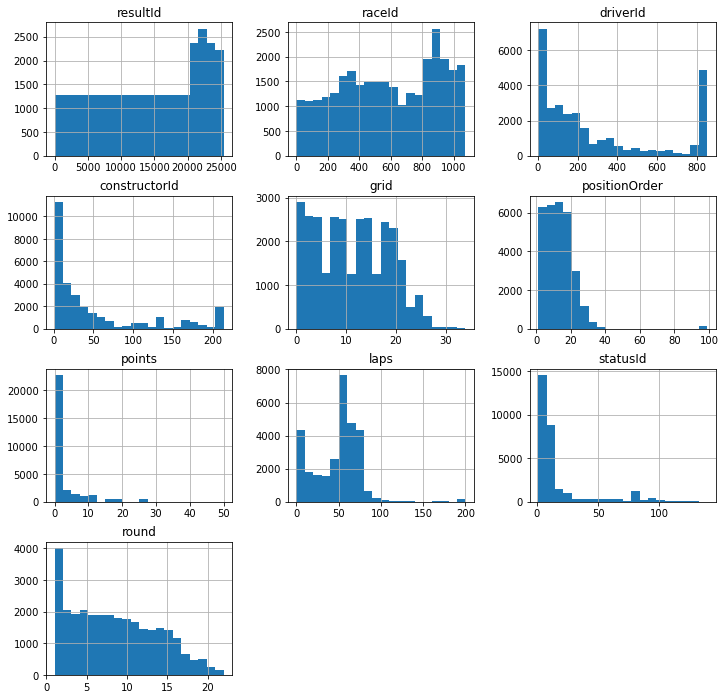

In [22]:
# plot histogram
df.hist(bins=20, figsize=(12,12))
plt.show()

<AxesSubplot:>

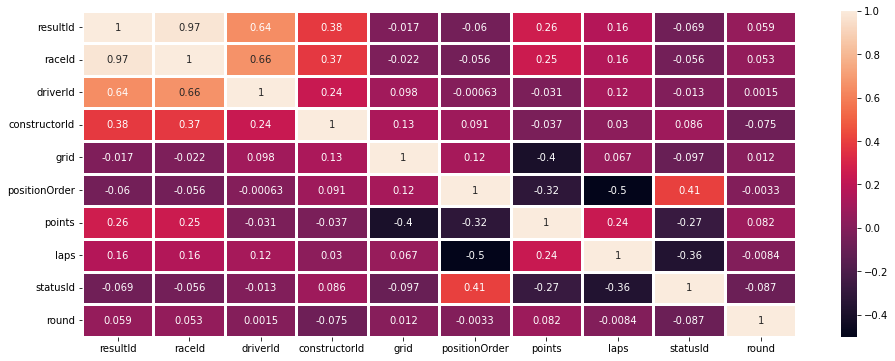

In [23]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linewidths=3.0)

## Step 3: Data Cleansing and Transformation

In [24]:
# driver name
df['driver'] = df['forename'] + " " + df['surname']

In [25]:
# calculate driver's age
df['dob'] = df['dob'].str[:4].astype(int)
df['age'] = 2022 - df['dob']
df['age']

0        37
1        45
2        37
3        41
4        41
         ..
29931    32
29932    27
29933    29
29934    24
29935    43
Name: age, Length: 29936, dtype: int32

In [26]:
# drop columns
df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId',
        'constructorId', 'time', 'dob', 'forename', 'surname'], axis=1, inplace=True)
df

raceId  driverId  grid  positionOrder  points milliseconds rank  \
0          18         1     1              1    10.0      5690616    2   
1          18         2     5              2     8.0      5696094    3   
2          18         3     7              3     6.0      5698779    5   
3          18         4    11              4     5.0      5707797    7   
4          18         5     3              5     4.0      5708630    1   
...       ...       ...   ...            ...     ...          ...  ...   
29931    1073       815     4             15     0.0           \N    2   
29932    1073       849    16             16     0.0           \N   15   
29933    1073       841    14             17     0.0           \N   16   
29934    1073       847    17             18     0.0           \N   19   
29935    1073         8    18             19     0.0           \N   18   

      fastestLapTime fastestLapSpeed        date  ... round  nationality  \
0            01:27.5           218.3   3/16/2008  ...     1      British   
1            01:27.7         217.586   3/16/2008  ...     1       German   
2            01:28.1         216.719   3/16/2008  ...     1       German   
3            01:28.6         215.464   3/16/2008  ...     1      Spanish   
4            01:27.4         218.385   3/16/2008  ...     1      Finnish   
...              ...             ...         ...  ...   ...          ...   
29931        01:26.4         219.993  12/12/2021  ...    22      Mexican   
29932        01:29.3         212.912  12/12/2021  ...    22     Canadian   
29933        01:29.4         212.557  12/12/2021  ...    22      Italian   
29934        01:30.6         209.732  12/12/2021  ...    22      British   
29935        01:29.7         211.951  12/12/2021  ...    22      Finnish   

      duration      name_y        q1        q2        q3    status  \
0          NaN     McLaren  1:26.572  1:25.187  1:26.714  Finished   
1          NaN  BMW Sauber  1:25.960  1:25.518  1:27.236  Finished   
2          NaN    Williams  1:26.295  1:26.059  1:28.687  Finished   
3          NaN     Renault  1:26.907  1:26.188        \N  Finished   
4          NaN     McLaren  1:25.664  1:25.452  1:27.079  Finished   
...        ...         ...       ...       ...       ...       ...   
29931   21.385    Red Bull  1:23.350  1:23.135  1:22.947    Engine   
29932   21.241    Williams  1:24.338        \N        \N  Accident   
29933   22.283  Alfa Romeo  1:24.118  1:24.251        \N   Gearbox   
29934      NaN    Williams  1:24.423        \N        \N   Gearbox   
29935   22.338  Alfa Romeo  1:24.779        \N        \N    Brakes   

                   driver age  
0          Lewis Hamilton  37  
1           Nick Heidfeld  45  
2            Nico Rosberg  37  
3         Fernando Alonso  41  
4       Heikki Kovalainen  41  
...                   ...  ..  
29931        Sergio Pérez  32  
29932     Nicholas Latifi  27  
29933  Antonio Giovinazzi  29  
29934      George Russell  24  
29935      Kimi Räikkönen  43  

[29936 rows x 21 columns]

In [27]:
# rename columns
df.rename(columns = {'rank':'fastest_lap_rank', 'name_x':'grandprix_name', 
                     'nationality':'driver_nationality', 'name_y':'constructor_name', 
                     'milliseconds':'time_taken', 'duration':'pitstop_duration'}, inplace=True)
df

raceId  driverId  grid  positionOrder  points time_taken  \
0          18         1     1              1    10.0    5690616   
1          18         2     5              2     8.0    5696094   
2          18         3     7              3     6.0    5698779   
3          18         4    11              4     5.0    5707797   
4          18         5     3              5     4.0    5708630   
...       ...       ...   ...            ...     ...        ...   
29931    1073       815     4             15     0.0         \N   
29932    1073       849    16             16     0.0         \N   
29933    1073       841    14             17     0.0         \N   
29934    1073       847    17             18     0.0         \N   
29935    1073         8    18             19     0.0         \N   

      fastest_lap_rank fastestLapTime fastestLapSpeed        date  ... round  \
0                    2        01:27.5           218.3   3/16/2008  ...     1   
1                    3        01:27.7         217.586   3/16/2008  ...     1   
2                    5        01:28.1         216.719   3/16/2008  ...     1   
3                    7        01:28.6         215.464   3/16/2008  ...     1   
4                    1        01:27.4         218.385   3/16/2008  ...     1   
...                ...            ...             ...         ...  ...   ...   
29931                2        01:26.4         219.993  12/12/2021  ...    22   
29932               15        01:29.3         212.912  12/12/2021  ...    22   
29933               16        01:29.4         212.557  12/12/2021  ...    22   
29934               19        01:30.6         209.732  12/12/2021  ...    22   
29935               18        01:29.7         211.951  12/12/2021  ...    22   

       driver_nationality pitstop_duration constructor_name        q1  \
0                 British              NaN          McLaren  1:26.572   
1                  German              NaN       BMW Sauber  1:25.960   
2                  German              NaN         Williams  1:26.295   
3                 Spanish              NaN          Renault  1:26.907   
4                 Finnish              NaN          McLaren  1:25.664   
...                   ...              ...              ...       ...   
29931             Mexican           21.385         Red Bull  1:23.350   
29932            Canadian           21.241         Williams  1:24.338   
29933             Italian           22.283       Alfa Romeo  1:24.118   
29934             British              NaN         Williams  1:24.423   
29935             Finnish           22.338       Alfa Romeo  1:24.779   

             q2        q3    status              driver age  
0      1:25.187  1:26.714  Finished      Lewis Hamilton  37  
1      1:25.518  1:27.236  Finished       Nick Heidfeld  45  
2      1:26.059  1:28.687  Finished        Nico Rosberg  37  
3      1:26.188        \N  Finished     Fernando Alonso  41  
4      1:25.452  1:27.079  Finished   Heikki Kovalainen  41  
...         ...       ...       ...                 ...  ..  
29931  1:23.135  1:22.947    Engine        Sergio Pérez  32  
29932        \N        \N  Accident     Nicholas Latifi  27  
29933  1:24.251        \N   Gearbox  Antonio Giovinazzi  29  
29934        \N        \N   Gearbox      George Russell  24  
29935        \N        \N    Brakes      Kimi Räikkönen  43  

[29936 rows x 21 columns]

In [28]:
# rearrange columns
df = df[['raceId', 'date', 'grandprix_name', 'round', 'driverId', 'driver', 'age', 'driver_nationality', 
         'constructor_name', 'grid', 'positionOrder', 'points', 'time_taken', 'q1', 'q2', 'q3', 'status', 
         'fastest_lap_rank', 'fastestLapTime', 'fastestLapSpeed', 'pitstop_duration']]

In [29]:
# replace \N to NaN
df.replace(r'\N', np.nan, inplace=True)
df

raceId        date         grandprix_name  round  driverId  \
0          18   3/16/2008  Australian Grand Prix      1         1   
1          18   3/16/2008  Australian Grand Prix      1         2   
2          18   3/16/2008  Australian Grand Prix      1         3   
3          18   3/16/2008  Australian Grand Prix      1         4   
4          18   3/16/2008  Australian Grand Prix      1         5   
...       ...         ...                    ...    ...       ...   
29931    1073  12/12/2021   Abu Dhabi Grand Prix     22       815   
29932    1073  12/12/2021   Abu Dhabi Grand Prix     22       849   
29933    1073  12/12/2021   Abu Dhabi Grand Prix     22       841   
29934    1073  12/12/2021   Abu Dhabi Grand Prix     22       847   
29935    1073  12/12/2021   Abu Dhabi Grand Prix     22         8   

                   driver  age driver_nationality constructor_name  grid  ...  \
0          Lewis Hamilton   37            British          McLaren     1  ...   
1           Nick Heidfeld   45             German       BMW Sauber     5  ...   
2            Nico Rosberg   37             German         Williams     7  ...   
3         Fernando Alonso   41            Spanish          Renault    11  ...   
4       Heikki Kovalainen   41            Finnish          McLaren     3  ...   
...                   ...  ...                ...              ...   ...  ...   
29931        Sergio Pérez   32            Mexican         Red Bull     4  ...   
29932     Nicholas Latifi   27           Canadian         Williams    16  ...   
29933  Antonio Giovinazzi   29            Italian       Alfa Romeo    14  ...   
29934      George Russell   24            British         Williams    17  ...   
29935      Kimi Räikkönen   43            Finnish       Alfa Romeo    18  ...   

       points  time_taken        q1        q2        q3    status  \
0        10.0     5690616  1:26.572  1:25.187  1:26.714  Finished   
1         8.0     5696094  1:25.960  1:25.518  1:27.236  Finished   
2         6.0     5698779  1:26.295  1:26.059  1:28.687  Finished   
3         5.0     5707797  1:26.907  1:26.188       NaN  Finished   
4         4.0     5708630  1:25.664  1:25.452  1:27.079  Finished   
...       ...         ...       ...       ...       ...       ...   
29931     0.0         NaN  1:23.350  1:23.135  1:22.947    Engine   
29932     0.0         NaN  1:24.338       NaN       NaN  Accident   
29933     0.0         NaN  1:24.118  1:24.251       NaN   Gearbox   
29934     0.0         NaN  1:24.423       NaN       NaN   Gearbox   
29935     0.0         NaN  1:24.779       NaN       NaN    Brakes   

      fastest_lap_rank fastestLapTime fastestLapSpeed pitstop_duration  
0                    2        01:27.5           218.3              NaN  
1                    3        01:27.7         217.586              NaN  
2                    5        01:28.1         216.719              NaN  
3                    7        01:28.6         215.464              NaN  
4                    1        01:27.4         218.385              NaN  
...                ...            ...             ...              ...  
29931                2        01:26.4         219.993           21.385  
29932               15        01:29.3         212.912           21.241  
29933               16        01:29.4         212.557           22.283  
29934               19        01:30.6         209.732              NaN  
29935               18        01:29.7         211.951           22.338  

[29936 rows x 21 columns]

In [30]:
# change race date with incorrect year

# incorrect year
df['date'] = df['date'].str.replace('4/5/12009','4/5/2009')
df['date'] = df['date'].str.replace('6/7/12009','6/7/2009')
df['date'] = df['date'].str.replace('9/4/12005','9/4/2005')
df['date'] = df['date'].str.replace('7/10/12011','7/10/2011')
df['date'] = df['date'].str.replace('4/12/12015','4/12/2015')
df['date'] = df['date'].str.replace('11/1/12015','11/1/2015')
df['date'] = df['date'].str.replace('10/29/12017','10/29/2017')
df['date'] = df['date'].str.replace('9/16/12018','9/16/2018')
df['date'] = df['date'].str.replace('8/30/12020','8/30/2020')
df['date'] = df['date'].str.replace('4/18/12021','4/18/2021')


In [31]:
# change format
df['date'] = pd.to_datetime(df['date'])

# extract year
df['year'] = df['date'].dt.year

In [32]:
# drop 'date'
df.drop(['date'], axis=1, inplace=True)

In [33]:
# fill in blanks for 'year'

df.loc[:,['raceId','driver','year']]
update_GGP =df.loc[(df['raceId'] == 27)]
update_GGP = update_GGP['year'].fillna(2008)
df.update(update_GGP)

update_JGP = df.loc[(df['raceId'] == 69)]
update_JGP = update_JGP['year'].fillna(2006)
df.update(update_JGP)

update_CGP = df.loc[(df['raceId'] == 105)]
update_CGP = update_CGP['year'].fillna(2004)
df.update(update_CGP)

update_AGP = df.loc[(df['raceId'] == 900)]
update_AGP = update_AGP['year'].fillna(2014)
df.update(update_AGP)

update_BGP = df.loc[(df['raceId'] == 917)]
update_BGP = update_BGP['year'].fillna(2014)
df.update(update_BGP)

update_AGP16 = df.loc[(df['raceId'] == 948)]
update_AGP16 = update_AGP16['year'].fillna(2016)
df.update(update_AGP16)

update_IGP = df.loc[(df['raceId'] == 961)]
update_IGP = update_IGP['year'].fillna(2016)
df.update(update_IGP)

update_CGP18 = df.loc[(df['raceId'] == 991)]
update_CGP18 = update_CGP18['year'].fillna(2018)
df.update(update_CGP18)

update_USGP = df.loc[(df['raceId'] == 1028)]
update_USGP = update_USGP['year'].fillna(2019)
df.update(update_USGP)

update_HGP = df.loc[(df['raceId'] == 1062)]
update_HGP = update_HGP['year'].fillna(2021)
df.update(update_HGP)

df.head()

raceId         grandprix_name  round  driverId             driver  age  \
0      18  Australian Grand Prix      1         1     Lewis Hamilton   37   
1      18  Australian Grand Prix      1         2      Nick Heidfeld   45   
2      18  Australian Grand Prix      1         3       Nico Rosberg   37   
3      18  Australian Grand Prix      1         4    Fernando Alonso   41   
4      18  Australian Grand Prix      1         5  Heikki Kovalainen   41   

  driver_nationality constructor_name  grid  positionOrder  ...  time_taken  \
0            British          McLaren     1              1  ...     5690616   
1             German       BMW Sauber     5              2  ...     5696094   
2             German         Williams     7              3  ...     5698779   
3            Spanish          Renault    11              4  ...     5707797   
4            Finnish          McLaren     3              5  ...     5708630   

         q1        q2        q3    status fastest_lap_rank fastestLapTime  \
0  1:26.572  1:25.187  1:26.714  Finished                2        01:27.5   
1  1:25.960  1:25.518  1:27.236  Finished                3        01:27.7   
2  1:26.295  1:26.059  1:28.687  Finished                5        01:28.1   
3  1:26.907  1:26.188       NaN  Finished                7        01:28.6   
4  1:25.664  1:25.452  1:27.079  Finished                1        01:27.4   

  fastestLapSpeed pitstop_duration    year  
0           218.3              NaN  2008.0  
1         217.586              NaN  2008.0  
2         216.719              NaN  2008.0  
3         215.464              NaN  2008.0  
4         218.385              NaN  2008.0  

[5 rows x 21 columns]

In [34]:
# change datatypes
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.time_taken = df.time_taken.astype(float)
df.year = df.year.astype(int)

In [35]:
print(sorted(df['year'].unique()))

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [36]:
# time taken to complete
df['time_taken'] = pd.to_datetime(df['time_taken'], unit='ms').dt.strftime('%H:%M:%S')

In [37]:
# change format
variable = ['q1', 'q2', 'q3']
for i in variable:
    df[i] = pd.to_datetime(df[i],errors = 'coerce')

pd.to_datetime(df.q1)
df['q1'] = df['q1'].dt.time

pd.to_datetime(df.q2)
df['q2'] = df['q2'].dt.time

pd.to_datetime(df.q3)
df['q3'] = df['q3'].dt.time

In [38]:
# reset index
df.reset_index(drop=True, inplace=True)
df

raceId         grandprix_name  round  driverId              driver  \
0          18  Australian Grand Prix      1         1      Lewis Hamilton   
1          18  Australian Grand Prix      1         2       Nick Heidfeld   
2          18  Australian Grand Prix      1         3        Nico Rosberg   
3          18  Australian Grand Prix      1         4     Fernando Alonso   
4          18  Australian Grand Prix      1         5   Heikki Kovalainen   
...       ...                    ...    ...       ...                 ...   
29931    1073   Abu Dhabi Grand Prix     22       815        Sergio Pérez   
29932    1073   Abu Dhabi Grand Prix     22       849     Nicholas Latifi   
29933    1073   Abu Dhabi Grand Prix     22       841  Antonio Giovinazzi   
29934    1073   Abu Dhabi Grand Prix     22       847      George Russell   
29935    1073   Abu Dhabi Grand Prix     22         8      Kimi Räikkönen   

       age driver_nationality constructor_name  grid  positionOrder  ...  \
0       37            British          McLaren     1              1  ...   
1       45             German       BMW Sauber     5              2  ...   
2       37             German         Williams     7              3  ...   
3       41            Spanish          Renault    11              4  ...   
4       41            Finnish          McLaren     3              5  ...   
...    ...                ...              ...   ...            ...  ...   
29931   32            Mexican         Red Bull     4             15  ...   
29932   27           Canadian         Williams    16             16  ...   
29933   29            Italian       Alfa Romeo    14             17  ...   
29934   24            British         Williams    17             18  ...   
29935   43            Finnish       Alfa Romeo    18             19  ...   

       time_taken        q1        q2        q3    status fastest_lap_rank  \
0        01:34:50  01:26:34  01:25:11  01:26:42  Finished              2.0   
1        01:34:56  01:25:57  01:25:31  01:27:14  Finished              3.0   
2        01:34:58  01:26:17  01:26:03  01:28:41  Finished              5.0   
3        01:35:07  01:26:54  01:26:11       NaT  Finished              7.0   
4        01:35:08  01:25:39  01:25:27  01:27:04  Finished              1.0   
...           ...       ...       ...       ...       ...              ...   
29931         NaN  01:23:21  01:23:08  01:22:56    Engine              2.0   
29932         NaN  01:24:20       NaT       NaT  Accident             15.0   
29933         NaN  01:24:07  01:24:15       NaT   Gearbox             16.0   
29934         NaN  01:24:25       NaT       NaT   Gearbox             19.0   
29935         NaN  01:24:46       NaT       NaT    Brakes             18.0   

       fastestLapTime fastestLapSpeed  pitstop_duration  year  
0             01:27.5         218.300               NaN  2008  
1             01:27.7         217.586               NaN  2008  
2             01:28.1         216.719               NaN  2008  
3             01:28.6         215.464               NaN  2008  
4             01:27.4         218.385               NaN  2008  
...               ...             ...               ...   ...  
29931         01:26.4         219.993            21.385  2021  
29932         01:29.3         212.912            21.241  2021  
29933         01:29.4         212.557            22.283  2021  
29934         01:30.6         209.732               NaN  2021  
29935         01:29.7         211.951            22.338  2021  

[29936 rows x 21 columns]

### Outliers

In [39]:
def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [40]:
upper_boundary, lower_boundary = find_boundaries(df,'points', 1.5)
upper_boundary, lower_boundary

outliers = np.where(df['points'] > upper_boundary, True,
                    np.where(df['points'] < lower_boundary, True, False))
outliers.sum()
outliers_df = df.loc[outliers, 'points']
print(outliers_df)

0        10.0
1         8.0
2         6.0
22       10.0
23        8.0
         ... 
29913    10.0
29914    10.0
29915     8.0
29916     6.0
29917     6.0
Name: points, Length: 4918, dtype: float64


In [41]:
upper_boundary, lower_boundary = find_boundaries(df,'fastestLapSpeed', 1.5)
upper_boundary, lower_boundary

outliers = np.where(df['fastestLapSpeed'] > upper_boundary, True,
                    np.where(df['fastestLapSpeed'] < lower_boundary, True, False))
outliers.sum()
outliers_df = df.loc[outliers, 'fastestLapSpeed']
print(outliers_df)

108      153.152
109      154.286
110      154.379
111      152.133
112      152.614
          ...   
28813    143.736
28814    141.108
28815    141.111
28816    140.802
29310    156.287
Name: fastestLapSpeed, Length: 441, dtype: float64


In [42]:
upper_boundary, lower_boundary = find_boundaries(df,'positionOrder', 1.5)
upper_boundary, lower_boundary

outliers = np.where(df['positionOrder'] > upper_boundary, True,
                    np.where(df['positionOrder'] < lower_boundary, True, False))
outliers.sum()
outliers_df = df.loc[outliers, 'positionOrder']
print(outliers_df)

268      99
288      99
308      99
328      99
368      99
         ..
29859    99
29860    99
29906    99
29907    99
29908    99
Name: positionOrder, Length: 160, dtype: int64


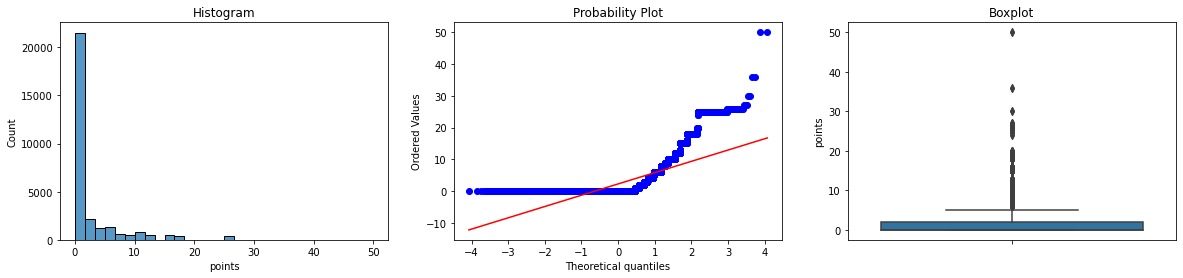

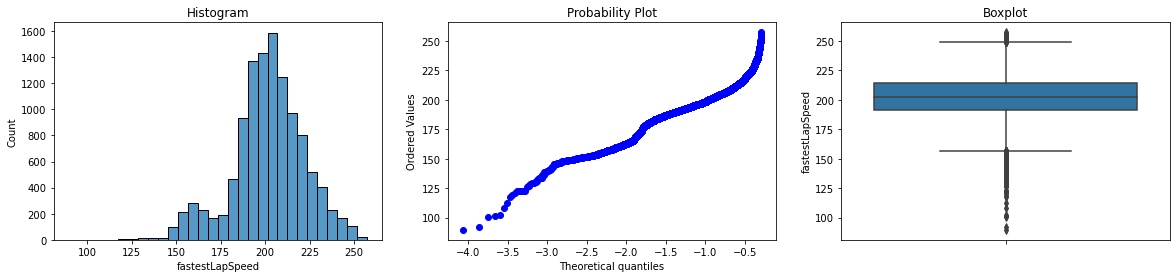

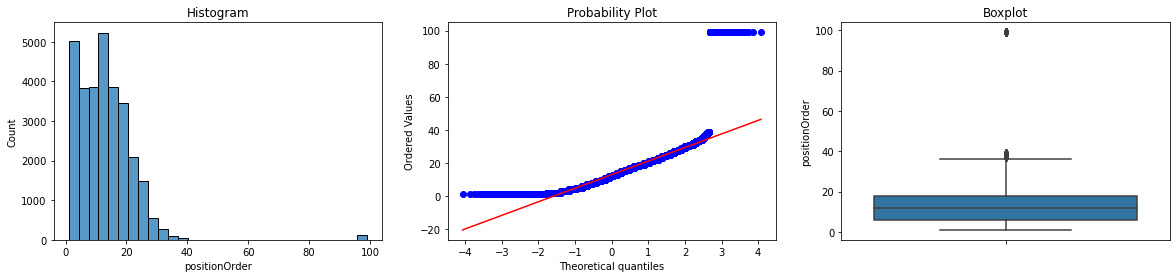

In [43]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
diagnostic_plots(df, 'points')
diagnostic_plots(df, 'fastestLapSpeed')
diagnostic_plots(df, 'positionOrder')

### Train and Test Split

In [44]:
# separate into training and testing set
# target variable as 'points'

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['raceId', 'points'], axis=1), 
    df['points'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((20955, 19), (8981, 19))

In [45]:
X_train

grandprix_name  round  driverId              driver  age  \
11212     Belgian Grand Prix      5       202       Didier Pironi   70   
29931   Abu Dhabi Grand Prix     22       815        Sergio Pérez   32   
12786   Argentine Grand Prix      1       203   Gilles Villeneuve   72   
320      Japanese Grand Prix     16        22  Rubens Barrichello   50   
13575    Austrian Grand Prix     12       207      Mario Andretti   82   
...                      ...    ...       ...                 ...  ...   
13123    Austrian Grand Prix     12       222      Jody Scheckter   72   
19648       Swiss Grand Prix      1       609         André Simon  102   
9845   Portuguese Grand Prix      2       105    Michele Alboreto   66   
10799     Belgian Grand Prix      6       137       Nelson Piquet   70   
2732     European Grand Prix      9        30  Michael Schumacher   53   

      driver_nationality constructor_name  grid  positionOrder time_taken  \
11212             French          Ferrari     0             27        NaN   
29931            Mexican         Red Bull     4             15        NaN   
12786           Canadian          Ferrari     7              8   01:38:43   
320            Brazilian            Honda    17             13        NaN   
13575           American       Team Lotus     3             24        NaN   
...                  ...              ...   ...            ...        ...   
13123      South African             Wolf     7             25        NaN   
19648             French          Ferrari     4             10        NaN   
9845             Italian          Ferrari     5              2   02:01:30   
10799          Brazilian          Brabham     4              4   01:27:53   
2732              German          Ferrari     1              1   01:29:42   

             q1        q2        q3    status  fastest_lap_rank  \
11212       NaT       NaT       NaT  Withdrew               NaN   
29931  01:23:21  01:23:08  01:22:56    Engine               2.0   
12786       NaT       NaT       NaT  Finished               NaN   
320    01:18:52       NaT       NaT    +1 Lap              16.0   
13575       NaT       NaT       NaT    Engine               NaN   
...         ...       ...       ...       ...               ...   
13123       NaT       NaT       NaT  Accident               NaN   
19648       NaT       NaT       NaT   Magneto               NaN   
9845        NaT       NaT       NaT  Finished               NaN   
10799       NaT       NaT       NaT  Finished               NaN   
2732        NaT       NaT       NaT  Finished               NaN   

      fastestLapTime  fastestLapSpeed pitstop_duration  year  
11212            NaN              NaN              NaN  1982  
29931        01:26.4          219.993           21.385  2021  
12786            NaN              NaN              NaN  1978  
320          01:20.6          203.869              NaN  2008  
13575            NaN              NaN              NaN  1977  
...              ...              ...              ...   ...  
13123            NaN              NaN              NaN  1978  
19648            NaN              NaN              NaN  1952  
9845             NaN              NaN              NaN  1985  
10799            NaN              NaN              NaN  1983  
2732             NaN              NaN              NaN  2001  

[20955 rows x 19 columns]

### Missing Value Imputation

In [46]:
# find numerical variables
num_cols = [c for c in X_train.columns if df[c].dtypes!='O']
X_train[num_cols].isnull().mean().sort_values()

round               0.00000
driverId            0.00000
age                 0.00000
grid                0.00000
positionOrder       0.00000
year                0.00000
fastest_lap_rank    0.61088
fastestLapSpeed     0.61780
dtype: float64

#### Numerical Variables

In [47]:
features_num = ['fastest_lap_rank', 'fastestLapSpeed']

In [48]:
imputer = ArbitraryNumberImputer(
    arbitrary_number=-1, variables=features_num)

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-1,
                       variables=['fastest_lap_rank', 'fastestLapSpeed'])

In [49]:
# and now we impute the data
X_train_num = imputer.transform(X_train)
X_test_num = imputer.transform(X_test)

X_train_num

grandprix_name  round  driverId              driver  age  \
11212     Belgian Grand Prix      5       202       Didier Pironi   70   
29931   Abu Dhabi Grand Prix     22       815        Sergio Pérez   32   
12786   Argentine Grand Prix      1       203   Gilles Villeneuve   72   
320      Japanese Grand Prix     16        22  Rubens Barrichello   50   
13575    Austrian Grand Prix     12       207      Mario Andretti   82   
...                      ...    ...       ...                 ...  ...   
13123    Austrian Grand Prix     12       222      Jody Scheckter   72   
19648       Swiss Grand Prix      1       609         André Simon  102   
9845   Portuguese Grand Prix      2       105    Michele Alboreto   66   
10799     Belgian Grand Prix      6       137       Nelson Piquet   70   
2732     European Grand Prix      9        30  Michael Schumacher   53   

      driver_nationality constructor_name  grid  positionOrder time_taken  \
11212             French          Ferrari     0             27        NaN   
29931            Mexican         Red Bull     4             15        NaN   
12786           Canadian          Ferrari     7              8   01:38:43   
320            Brazilian            Honda    17             13        NaN   
13575           American       Team Lotus     3             24        NaN   
...                  ...              ...   ...            ...        ...   
13123      South African             Wolf     7             25        NaN   
19648             French          Ferrari     4             10        NaN   
9845             Italian          Ferrari     5              2   02:01:30   
10799          Brazilian          Brabham     4              4   01:27:53   
2732              German          Ferrari     1              1   01:29:42   

             q1        q2        q3    status  fastest_lap_rank  \
11212       NaT       NaT       NaT  Withdrew              -1.0   
29931  01:23:21  01:23:08  01:22:56    Engine               2.0   
12786       NaT       NaT       NaT  Finished              -1.0   
320    01:18:52       NaT       NaT    +1 Lap              16.0   
13575       NaT       NaT       NaT    Engine              -1.0   
...         ...       ...       ...       ...               ...   
13123       NaT       NaT       NaT  Accident              -1.0   
19648       NaT       NaT       NaT   Magneto              -1.0   
9845        NaT       NaT       NaT  Finished              -1.0   
10799       NaT       NaT       NaT  Finished              -1.0   
2732        NaT       NaT       NaT  Finished              -1.0   

      fastestLapTime  fastestLapSpeed pitstop_duration  year  
11212            NaN           -1.000              NaN  1982  
29931        01:26.4          219.993           21.385  2021  
12786            NaN           -1.000              NaN  1978  
320          01:20.6          203.869              NaN  2008  
13575            NaN           -1.000              NaN  1977  
...              ...              ...              ...   ...  
13123            NaN           -1.000              NaN  1978  
19648            NaN           -1.000              NaN  1952  
9845             NaN           -1.000              NaN  1985  
10799            NaN           -1.000              NaN  1983  
2732             NaN           -1.000              NaN  2001  

[20955 rows x 19 columns]

In [50]:
X_train_num[num_cols].isnull().mean().sort_values()

round               0.0
driverId            0.0
age                 0.0
grid                0.0
positionOrder       0.0
fastest_lap_rank    0.0
fastestLapSpeed     0.0
year                0.0
dtype: float64

#### Categorical Variables

In [51]:
# find categorical variables
cat_cols = [c for c in X_train.columns if df[c].dtypes=='O']
X_train[cat_cols].isnull().mean().sort_values()

grandprix_name        0.000000
driver                0.000000
driver_nationality    0.000000
constructor_name      0.000000
status                0.000000
q1                    0.552136
fastestLapTime        0.617800
time_taken            0.692961
pitstop_duration      0.704414
q2                    0.730470
q3                    0.833834
dtype: float64

In [52]:
# frequency of each category in each column
for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print('\n')

grandprix_name
British Grand Prix               2001
Italian Grand Prix               1894
German Grand Prix                1849
Belgian Grand Prix               1735
Monaco Grand Prix                1702
Spanish Grand Prix               1524
French Grand Prix                1472
Brazilian Grand Prix             1441
Canadian Grand Prix              1364
Hungarian Grand Prix             1175
United States Grand Prix         1114
Japanese Grand Prix              1033
Australian Grand Prix             963
Austrian Grand Prix               942
Dutch Grand Prix                  716
San Marino Grand Prix             667
Bahrain Grand Prix                655
Malaysian Grand Prix              647
Chinese Grand Prix                622
European Grand Prix               606
South African Grand Prix          581
Singapore Grand Prix              551
Mexican Grand Prix                527
Portuguese Grand Prix             499
Argentine Grand Prix              448
Abu Dhabi Grand Prix              4

In [53]:
vars_categorical = ['q1', 'q2', 'q3', 'fastestLapTime', 'time_taken', 'pitstop_duration']

In [54]:
pipe = Pipeline(steps=[
    ('imp_cat_missing', mdi.CategoricalImputer(variables = vars_categorical, imputation_method='missing'))
])

pipe.fit(X_train_num)

Pipeline(steps=[('imp_cat_missing',
                 CategoricalImputer(variables=['q1', 'q2', 'q3',
                                               'fastestLapTime', 'time_taken',
                                               'pitstop_duration']))])

In [55]:
X_train_cat = pipe.transform(X_train_num)
X_test_cat = pipe.transform(X_test_num)

In [56]:
X_train_cat

grandprix_name  round  driverId              driver  age  \
11212     Belgian Grand Prix      5       202       Didier Pironi   70   
29931   Abu Dhabi Grand Prix     22       815        Sergio Pérez   32   
12786   Argentine Grand Prix      1       203   Gilles Villeneuve   72   
320      Japanese Grand Prix     16        22  Rubens Barrichello   50   
13575    Austrian Grand Prix     12       207      Mario Andretti   82   
...                      ...    ...       ...                 ...  ...   
13123    Austrian Grand Prix     12       222      Jody Scheckter   72   
19648       Swiss Grand Prix      1       609         André Simon  102   
9845   Portuguese Grand Prix      2       105    Michele Alboreto   66   
10799     Belgian Grand Prix      6       137       Nelson Piquet   70   
2732     European Grand Prix      9        30  Michael Schumacher   53   

      driver_nationality constructor_name  grid  positionOrder time_taken  \
11212             French          Ferrari     0             27    Missing   
29931            Mexican         Red Bull     4             15    Missing   
12786           Canadian          Ferrari     7              8   01:38:43   
320            Brazilian            Honda    17             13    Missing   
13575           American       Team Lotus     3             24    Missing   
...                  ...              ...   ...            ...        ...   
13123      South African             Wolf     7             25    Missing   
19648             French          Ferrari     4             10    Missing   
9845             Italian          Ferrari     5              2   02:01:30   
10799          Brazilian          Brabham     4              4   01:27:53   
2732              German          Ferrari     1              1   01:29:42   

             q1        q2        q3    status  fastest_lap_rank  \
11212   Missing   Missing   Missing  Withdrew              -1.0   
29931  01:23:21  01:23:08  01:22:56    Engine               2.0   
12786   Missing   Missing   Missing  Finished              -1.0   
320    01:18:52   Missing   Missing    +1 Lap              16.0   
13575   Missing   Missing   Missing    Engine              -1.0   
...         ...       ...       ...       ...               ...   
13123   Missing   Missing   Missing  Accident              -1.0   
19648   Missing   Missing   Missing   Magneto              -1.0   
9845    Missing   Missing   Missing  Finished              -1.0   
10799   Missing   Missing   Missing  Finished              -1.0   
2732    Missing   Missing   Missing  Finished              -1.0   

      fastestLapTime  fastestLapSpeed pitstop_duration  year  
11212        Missing           -1.000          Missing  1982  
29931        01:26.4          219.993           21.385  2021  
12786        Missing           -1.000          Missing  1978  
320          01:20.6          203.869          Missing  2008  
13575        Missing           -1.000          Missing  1977  
...              ...              ...              ...   ...  
13123        Missing           -1.000          Missing  1978  
19648        Missing           -1.000          Missing  1952  
9845         Missing           -1.000          Missing  1985  
10799        Missing           -1.000          Missing  1983  
2732         Missing           -1.000          Missing  2001  

[20955 rows x 19 columns]

In [57]:
X_train_cat[cat_cols].isnull().mean().sort_values()

grandprix_name        0.0
driver                0.0
driver_nationality    0.0
constructor_name      0.0
time_taken            0.0
q1                    0.0
q2                    0.0
q3                    0.0
status                0.0
fastestLapTime        0.0
pitstop_duration      0.0
dtype: float64

#### One Hot Encoding

In [58]:
from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=5,  
    
    # we can select which variables to encode
    variables=['driver'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

ohe_enc.fit(X_train_cat)

OneHotEncoder(top_categories=5, variables=['driver'])

In [59]:
X_train_cat = ohe_enc.transform(X_train_cat)
X_test_cat = ohe_enc.transform(X_test_cat)

In [60]:
X_train_cat

grandprix_name  round  driverId  age driver_nationality  \
11212     Belgian Grand Prix      5       202   70             French   
29931   Abu Dhabi Grand Prix     22       815   32            Mexican   
12786   Argentine Grand Prix      1       203   72           Canadian   
320      Japanese Grand Prix     16        22   50          Brazilian   
13575    Austrian Grand Prix     12       207   82           American   
...                      ...    ...       ...  ...                ...   
13123    Austrian Grand Prix     12       222   72      South African   
19648       Swiss Grand Prix      1       609  102             French   
9845   Portuguese Grand Prix      2       105   66            Italian   
10799     Belgian Grand Prix      6       137   70          Brazilian   
2732     European Grand Prix      9        30   53             German   

      constructor_name  grid  positionOrder time_taken        q1  ...  \
11212          Ferrari     0             27    Missing   Missing  ...   
29931         Red Bull     4             15    Missing  01:23:21  ...   
12786          Ferrari     7              8   01:38:43   Missing  ...   
320              Honda    17             13    Missing  01:18:52  ...   
13575       Team Lotus     3             24    Missing   Missing  ...   
...                ...   ...            ...        ...       ...  ...   
13123             Wolf     7             25    Missing   Missing  ...   
19648          Ferrari     4             10    Missing   Missing  ...   
9845           Ferrari     5              2   02:01:30   Missing  ...   
10799          Brabham     4              4   01:27:53   Missing  ...   
2732           Ferrari     1              1   01:29:42   Missing  ...   

      fastest_lap_rank fastestLapTime fastestLapSpeed  pitstop_duration  year  \
11212             -1.0        Missing          -1.000           Missing  1982   
29931              2.0        01:26.4         219.993            21.385  2021   
12786             -1.0        Missing          -1.000           Missing  1978   
320               16.0        01:20.6         203.869           Missing  2008   
13575             -1.0        Missing          -1.000           Missing  1977   
...                ...            ...             ...               ...   ...   
13123             -1.0        Missing          -1.000           Missing  1978   
19648             -1.0        Missing          -1.000           Missing  1952   
9845              -1.0        Missing          -1.000           Missing  1985   
10799             -1.0        Missing          -1.000           Missing  1983   
2732              -1.0        Missing          -1.000           Missing  2001   

       driver_Kimi Räikkönen driver_Fernando Alonso  driver_Sebastian Vettel  \
11212                      0                      0                        0   
29931                      0                      0                        0   
12786                      0                      0                        0   
320                        0                      0                        0   
13575                      0                      0                        0   
...                      ...                    ...                      ...   
13123                      0                      0                        0   
19648                      0                      0                        0   
9845                       0                      0                        0   
10799                      0                      0                        0   
2732                       0                      0                        0   

       driver_Lewis Hamilton  driver_Jenson Button  
11212                      0                     0  
29931                      0                     0  
12786                      0                     0  
320                        0                     0  
13575                      0                     0  
...     

#### Rare Encoding

In [61]:
rare_categorical = ['grandprix_name', 'constructor_name', 'q1', 'q2', 'q3', 'fastestLapTime', 
                    'time_taken', 'pitstop_duration', 'status', 'driver_nationality']

In [62]:
# Rare category encoder
rare_encoder = RareLabelEncoder(tol=0.03, n_categories=4, variables=rare_categorical)

# let's fit the encoder to the train set
rare_encoder.fit(X_train_cat)

RareLabelEncoder(n_categories=4, tol=0.03,
                 variables=['grandprix_name', 'constructor_name', 'q1', 'q2',
                            'q3', 'fastestLapTime', 'time_taken',
                            'pitstop_duration', 'status',
                            'driver_nationality'])

In [63]:
# let's transform the train and test sets
X_train_cat = rare_encoder.transform(X_train_cat)
X_test_cat = rare_encoder.transform(X_test_cat)

In [64]:
X_train_cat

grandprix_name  round  driverId  age driver_nationality  \
11212   Belgian Grand Prix      5       202   70             French   
29931                 Rare     22       815   32               Rare   
12786                 Rare      1       203   72               Rare   
320    Japanese Grand Prix     16        22   50          Brazilian   
13575  Austrian Grand Prix     12       207   82           American   
...                    ...    ...       ...  ...                ...   
13123  Austrian Grand Prix     12       222   72               Rare   
19648                 Rare      1       609  102             French   
9845                  Rare      2       105   66            Italian   
10799   Belgian Grand Prix      6       137   70          Brazilian   
2732                  Rare      9        30   53             German   

      constructor_name  grid  positionOrder time_taken       q1  ...  \
11212          Ferrari     0             27    Missing  Missing  ...   
29931         Red Bull     4             15    Missing     Rare  ...   
12786          Ferrari     7              8       Rare  Missing  ...   
320               Rare    17             13    Missing     Rare  ...   
13575             Rare     3             24    Missing  Missing  ...   
...                ...   ...            ...        ...      ...  ...   
13123             Rare     7             25    Missing  Missing  ...   
19648          Ferrari     4             10    Missing  Missing  ...   
9845           Ferrari     5              2       Rare  Missing  ...   
10799             Rare     4              4       Rare  Missing  ...   
2732           Ferrari     1              1       Rare  Missing  ...   

      fastest_lap_rank fastestLapTime fastestLapSpeed  pitstop_duration  year  \
11212             -1.0        Missing          -1.000           Missing  1982   
29931              2.0           Rare         219.993              Rare  2021   
12786             -1.0        Missing          -1.000           Missing  1978   
320               16.0           Rare         203.869           Missing  2008   
13575             -1.0        Missing          -1.000           Missing  1977   
...                ...            ...             ...               ...   ...   
13123             -1.0        Missing          -1.000           Missing  1978   
19648             -1.0        Missing          -1.000           Missing  1952   
9845              -1.0        Missing          -1.000           Missing  1985   
10799             -1.0        Missing          -1.000           Missing  1983   
2732              -1.0        Missing          -1.000           Missing  2001   

       driver_Kimi Räikkönen driver_Fernando Alonso  driver_Sebastian Vettel  \
11212                      0                      0                        0   
29931                      0                      0                        0   
12786                      0                      0                        0   
320                        0                      0                        0   
13575                      0                      0                        0   
...                      ...                    ...                      ...   
13123                      0                      0                        0   
19648                      0                      0                        0   
9845                       0                      0                        0   
10799                      0                      0                        0   
2732                       0                      0                        0   

       driver_Lewis Hamilton  driver_Jenson Button  
11212                      0                     0  
29931                      0                     0  
12786                      0                     0  
320                        0                     0  
13575                      0                     0  
...                      ...              

#### Count Encoding

In [65]:
count_encoder = CountFrequencyEncoder(encoding_method='count', variables='status')
count_encoder.fit(X_train_cat)
X_train_cat = count_encoder.transform(X_train_cat)
X_test_cat = count_encoder.transform(X_test_cat)

In [66]:
count_encoder.encoder_dict_

{'status': {'Rare': 6755,
  'Finished': 6428,
  '+1 Lap': 3555,
  'Engine': 1401,
  '+2 Laps': 1326,
  'Accident': 774,
  'Did not qualify': 716}}

In [67]:
X_train_cat

grandprix_name  round  driverId  age driver_nationality  \
11212   Belgian Grand Prix      5       202   70             French   
29931                 Rare     22       815   32               Rare   
12786                 Rare      1       203   72               Rare   
320    Japanese Grand Prix     16        22   50          Brazilian   
13575  Austrian Grand Prix     12       207   82           American   
...                    ...    ...       ...  ...                ...   
13123  Austrian Grand Prix     12       222   72               Rare   
19648                 Rare      1       609  102             French   
9845                  Rare      2       105   66            Italian   
10799   Belgian Grand Prix      6       137   70          Brazilian   
2732                  Rare      9        30   53             German   

      constructor_name  grid  positionOrder time_taken       q1  ...  \
11212          Ferrari     0             27    Missing  Missing  ...   
29931         Red Bull     4             15    Missing     Rare  ...   
12786          Ferrari     7              8       Rare  Missing  ...   
320               Rare    17             13    Missing     Rare  ...   
13575             Rare     3             24    Missing  Missing  ...   
...                ...   ...            ...        ...      ...  ...   
13123             Rare     7             25    Missing  Missing  ...   
19648          Ferrari     4             10    Missing  Missing  ...   
9845           Ferrari     5              2       Rare  Missing  ...   
10799             Rare     4              4       Rare  Missing  ...   
2732           Ferrari     1              1       Rare  Missing  ...   

      fastest_lap_rank fastestLapTime  fastestLapSpeed  pitstop_duration  \
11212             -1.0        Missing           -1.000           Missing   
29931              2.0           Rare          219.993              Rare   
12786             -1.0        Missing           -1.000           Missing   
320               16.0           Rare          203.869           Missing   
13575             -1.0        Missing           -1.000           Missing   
...                ...            ...              ...               ...   
13123             -1.0        Missing           -1.000           Missing   
19648             -1.0        Missing           -1.000           Missing   
9845              -1.0        Missing           -1.000           Missing   
10799             -1.0        Missing           -1.000           Missing   
2732              -1.0        Missing           -1.000           Missing   

       year  driver_Kimi Räikkönen driver_Fernando Alonso  \
11212  1982                      0                      0   
29931  2021                      0                      0   
12786  1978                      0                      0   
320    2008                      0                      0   
13575  1977                      0                      0   
...     ...                    ...                    ...   
13123  1978                      0                      0   
19648  1952                      0                      0   
9845   1985                      0                      0   
10799  1983                      0                      0   
2732   2001                      0                      0   

       driver_Sebastian Vettel  driver_Lewis Hamilton  driver_Jenson Button  
11212                        0                      0                     0  
29931                        0                      0                     0  
12786                        0                      0                     0  
320                          0                      0                     0  
13575                        0                      0                     0  
...                        ...                    ...                   ...  
13123                        0                      0                     0  
19648                   

#### Ordinal Encoding

In [68]:
final_categorical = ['grandprix_name', 'constructor_name', 'q1', 'q2', 'q3', 'fastestLapTime', 
                    'time_taken', 'pitstop_duration', 'driver_nationality']

# encode X_train & X_test using Ordinal Encoding
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=final_categorical)

ordinal_enc.fit(X_train_cat)

# ordinal_enc.variables

# ordinal_enc.encoder_dict_

# let's transform train and test sets
X_train_cat = ordinal_enc.transform(X_train_cat)
X_test_cat = ordinal_enc.transform(X_test_cat)

In [69]:
X_train_cat

grandprix_name  round  driverId  age  driver_nationality  \
11212               0      5       202   70                   0   
29931               1     22       815   32                   1   
12786               1      1       203   72                   1   
320                 2     16        22   50                   2   
13575               3     12       207   82                   3   
...               ...    ...       ...  ...                 ...   
13123               3     12       222   72                   1   
19648               1      1       609  102                   0   
9845                1      2       105   66                   8   
10799               0      6       137   70                   2   
2732                1      9        30   53                   7   

       constructor_name  grid  positionOrder  time_taken  q1  ...  \
11212                 0     0             27           0   0  ...   
29931                 1     4             15           0   1  ...   
12786                 0     7              8           1   0  ...   
320                   2    17             13           0   1  ...   
13575                 2     3             24           0   0  ...   
...                 ...   ...            ...         ...  ..  ...   
13123                 2     7             25           0   0  ...   
19648                 0     4             10           0   0  ...   
9845                  0     5              2           1   0  ...   
10799                 2     4              4           1   0  ...   
2732                  0     1              1           1   0  ...   

       fastest_lap_rank  fastestLapTime  fastestLapSpeed  pitstop_duration  \
11212              -1.0               0           -1.000                 0   
29931               2.0               1          219.993                 1   
12786              -1.0               0           -1.000                 0   
320                16.0               1          203.869                 0   
13575              -1.0               0           -1.000                 0   
...                 ...             ...              ...               ...   
13123              -1.0               0           -1.000                 0   
19648              -1.0               0           -1.000                 0   
9845               -1.0               0           -1.000                 0   
10799              -1.0               0           -1.000                 0   
2732               -1.0               0           -1.000                 0   

       year  driver_Kimi Räikkönen  driver_Fernando Alonso  \
11212  1982                      0                       0   
29931  2021                      0                       0   
12786  1978                      0                       0   
320    2008                      0                       0   
13575  1977                      0                       0   
...     ...                    ...                     ...   
13123  1978                      0                       0   
19648  1952                      0                       0   
9845   1985                      0                       0   
10799  1983                      0                       0   
2732   2001                      0                       0   

       driver_Sebastian Vettel  driver_Lewis Hamilton  driver_Jenson Button  
11212                        0                      0                     0  
29931                        0                      0                     0  
12786                        0                      0                     0  
320                          0                      0                     0  
13575                        0                      0                     0  
...                        ...                    ...                   ...  
13123                        0                      0                     0  
19648                        0                      0              

In [70]:
# from feature_engine.encoding import MeanEncoder

# # let's create the encoder

# mean_enc = MeanEncoder(variables=None)

# # when fitting the transformer, we need to pass the target as well
# # just like with any Scikit-learn predictor class

# mean_enc.fit(X_train_cat, y_train)

# # variables that will be encoded

# mean_enc.variables

# # in the encoder dict we can observe the target mean per category
# # per variable

# mean_enc.encoder_dict_

# # let's transform train and test set

# X_train_cat = mean_enc.transform(X_train_cat)
# X_test_cat = mean_enc.transform(X_test_cat)

In [71]:
# from feature_engine.encoding import OneHotEncoder

# ohe_enc = OneHotEncoder(
#     top_categories=None,
#     drop_last=False)  # to return k-1, false to return k
# #use drop_last = False

# ohe_enc.fit(X_train_cat)

# ohe_enc.variables

# X_train_enc = ohe_enc.transform(X_train_cat)
# X_test_enc = ohe_enc.transform(X_test_cat)

# X_train_enc.head()

# X_test_enc.head()

### Transformation

#### Before Transformation

In [72]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

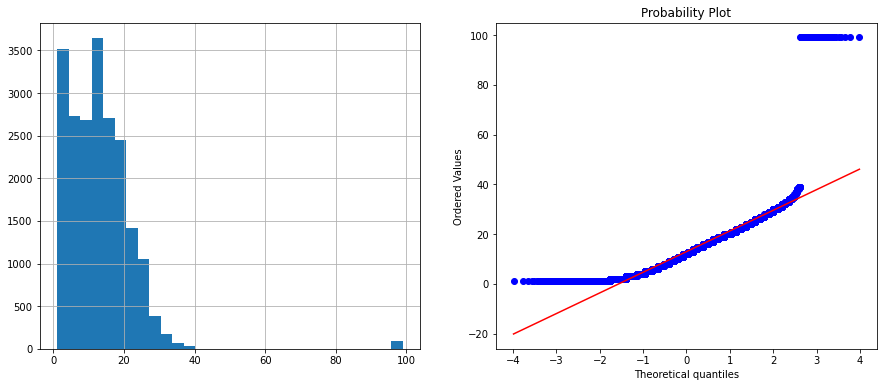

In [73]:
# check original distribution
diagnostic_plots(X_train_cat, 'positionOrder')

#### Power Transformation

In [74]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['positionOrder'], exp=1/2)

# fit transformer to data 
et.fit(X_train_cat)

# transform indicated variables within our dataframe
X_train_tf = et.transform(X_train_cat)
X_test_tf = et.transform(X_test_cat)

#### After Transformation

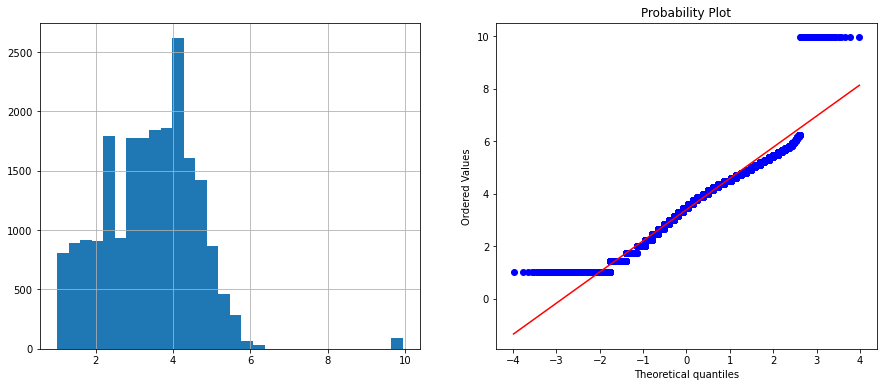

In [75]:
# make diagnostic plot of transformed variable
diagnostic_plots(X_train_tf, 'positionOrder')

#### Yeo-Johnson Transformation

In [76]:
# from feature_engine.transformation import YeoJohnsonTransformer

# # initialize the transformer with a subset of variables to transform
# yjt = YeoJohnsonTransformer(variables = ['positionOrder'])

# # fit transformer to the dataframe
# yjt.fit(X_train_cat)

# # transform indicated variables
# X_train_tf = yjt.transform(X_train_cat)
# X_test_tf = yjt.transform(X_test_cat)

#### Log Transformation

In [77]:
# #log transformer
# # not preferred for fastest lap rank, speed, pitstop (neg values) , position order (not evently distributed)
# from feature_engine.transformation import LogTransformer
# # initialize the transformer
# lt = LogTransformer(variables='positionOrder')

# # fit transformer to data set
# lt.fit(X_train_cat)

# # transform variables within our data set
# X_train_tf = lt.transform(X_train_cat)
# X_test_tf = et.transform(X_test_cat)

#### Reciprocal Transformation

In [78]:
# from feature_engine.transformation import ReciprocalTransformer

# # initialize the transformer
# rt = ReciprocalTransformer(variables = ['positionOrder'])

# # fit transformer to the entire dataframe
# rt.fit(X_train_cat)

# # transform the indicated variables within our data set
# X_train_tf = rt.transform(X_train_cat)
# X_test_tf = rt.transform(X_test_cat)

#### Box Cox Transformation

In [79]:
# from feature_engine.transformation import BoxCoxTransformer

# # initialize the transformer with a group of variables to transform
# bct = BoxCoxTransformer(variables = ['positionOrder'])

# # fit transformer to the data set
# bct.fit(X_train_cat)

# # transform the indicated variables in our dataframe
# # returns a new dataframe

# X_train_tf = bct.transform(X_train_cat)
# X_test_tf = bct.transform(X_test_cat)

### Variable Discretization

#### Equal-Frequency Discretization

In [80]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(q=10, variables = ['positionOrder', 'fastestLapSpeed'])

disc.fit(X_train_tf)

# transform train and test sets
train_t = disc.transform(X_train_tf)
test_t = disc.transform(X_test_tf)

Text(0, 0.5, 'Number of observations per bin')

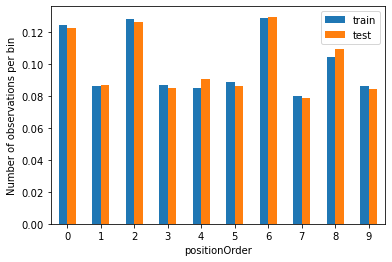

In [81]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# positionOrder

t1 = train_t.groupby(['positionOrder'])['positionOrder'].count() / len(train_t)
t2 = test_t.groupby(['positionOrder'])['positionOrder'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Mean of Points')

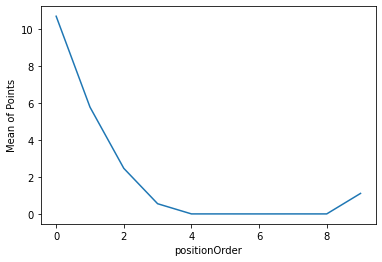

In [82]:
# explore if the bins have a linear relationship with the target
pd.concat([train_t, y_train], axis=1).groupby('positionOrder')['points'].mean().plot()
plt.ylabel('Mean of Points')

Text(0, 0.5, 'Number of observations per bin')

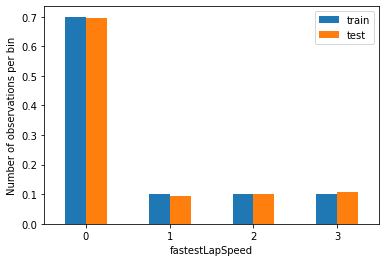

In [83]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# fastestLapSpeed

t1 = train_t.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(train_t)
t2 = test_t.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Mean of Points')

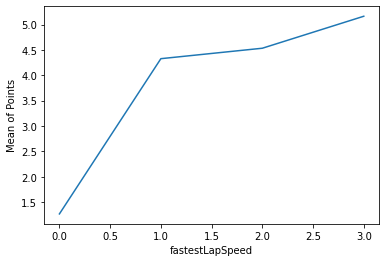

In [84]:
# explore if the bins have a linear relationship with the target
pd.concat([train_t, y_train], axis=1).groupby('fastestLapSpeed')['points'].mean().plot()
plt.ylabel('Mean of Points')

In [85]:
train_t

grandprix_name  round  driverId  age  driver_nationality  \
11212               0      5       202   70                   0   
29931               1     22       815   32                   1   
12786               1      1       203   72                   1   
320                 2     16        22   50                   2   
13575               3     12       207   82                   3   
...               ...    ...       ...  ...                 ...   
13123               3     12       222   72                   1   
19648               1      1       609  102                   0   
9845                1      2       105   66                   8   
10799               0      6       137   70                   2   
2732                1      9        30   53                   7   

       constructor_name  grid  positionOrder  time_taken  q1  ...  \
11212                 0     0              9           0   0  ...   
29931                 1     4              6           0   1  ...   
12786                 0     7              2           1   0  ...   
320                   2    17              5           0   1  ...   
13575                 2     3              9           0   0  ...   
...                 ...   ...            ...         ...  ..  ...   
13123                 2     7              9           0   0  ...   
19648                 0     4              3           0   0  ...   
9845                  0     5              0           1   0  ...   
10799                 2     4              1           1   0  ...   
2732                  0     1              0           1   0  ...   

       fastest_lap_rank  fastestLapTime  fastestLapSpeed  pitstop_duration  \
11212              -1.0               0                0                 0   
29931               2.0               1                3                 1   
12786              -1.0               0                0                 0   
320                16.0               1                2                 0   
13575              -1.0               0                0                 0   
...                 ...             ...              ...               ...   
13123              -1.0               0                0                 0   
19648              -1.0               0                0                 0   
9845               -1.0               0                0                 0   
10799              -1.0               0                0                 0   
2732               -1.0               0                0                 0   

       year  driver_Kimi Räikkönen  driver_Fernando Alonso  \
11212  1982                      0                       0   
29931  2021                      0                       0   
12786  1978                      0                       0   
320    2008                      0                       0   
13575  1977                      0                       0   
...     ...                    ...                     ...   
13123  1978                      0                       0   
19648  1952                      0                       0   
9845   1985                      0                       0   
10799  1983                      0                       0   
2732   2001                      0                       0   

       driver_Sebastian Vettel  driver_Lewis Hamilton  driver_Jenson Button  
11212                        0                      0                     0  
29931                        0                      0                     0  
12786                        0                      0                     0  
320                          0                      0                     0  
13575                        0                      0                     0  
...                        ...                    ...                   ...  
13123                        0                      0                     0  
19648                        0                      0              

#### Equal-Width Discretization

In [86]:
# # with feature engine we can automate the process for many variables
# # in one line of code

# from feature_engine.discretisation import EqualWidthDiscretiser

# disc = EqualWidthDiscretiser(bins=10, variables = ['positionOrder', 'fastestLapSpeed'])

# disc.fit(X_train_tf)

# # transform train and test sets
# train_t = disc.transform(X_train_tf)
# test_t = disc.transform(X_test_tf)

In [87]:
# # if the distributions in train and test set are similar, we should expect similar propotion of
# # observations in the different intervals in the train and test set

# # positionOrder

# t1 = train_t.groupby(['positionOrder'])['positionOrder'].count() / len(train_t)
# t2 = test_t.groupby(['positionOrder'])['positionOrder'].count() / len(test_t)

# tmp = pd.concat([t1, t2], axis=1)
# tmp.columns = ['train', 'test']
# tmp.plot.bar()
# plt.xticks(rotation=0)
# plt.ylabel('Number of observations per bin')

In [88]:
# # if the distributions in train and test set are similar, we should expect similar propotion of
# # observations in the different intervals in the train and test set

# # fastestLapSpeed

# t1 = train_t.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(train_t)
# t2 = test_t.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(test_t)

# tmp = pd.concat([t1, t2], axis=1)
# tmp.columns = ['train', 'test']
# tmp.plot.bar()
# plt.xticks(rotation=0)
# plt.ylabel('Number of observations per bin')

### Feature Scaling

#### Standardization

In [89]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

In [90]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_tf.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_tf.columns)

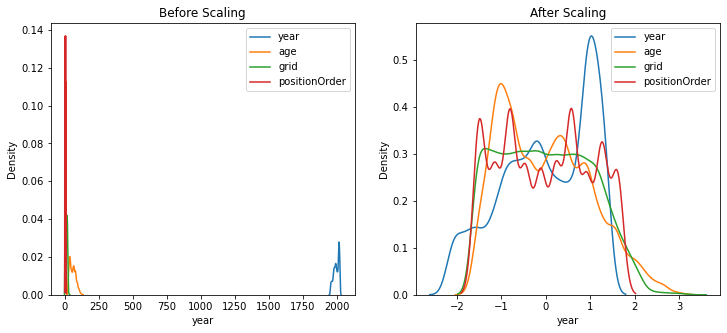

In [91]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(train_t['year'], ax=ax1, label ='year')
sns.kdeplot(train_t['age'], ax=ax1, label ='age')
sns.kdeplot(train_t['grid'], ax=ax1, label ='grid')
sns.kdeplot(train_t['positionOrder'], ax=ax1, label ='positionOrder')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['year'], ax=ax2, label ='year')
sns.kdeplot(X_train_scaled['age'], ax=ax2, label ='age')
sns.kdeplot(X_train_scaled['grid'], ax=ax2, label ='grid')
sns.kdeplot(X_train_scaled['positionOrder'], ax=ax2, label ='positionOrder')
ax2.legend()
plt.show()

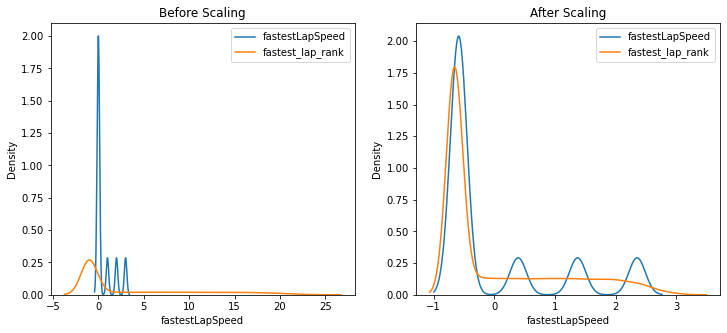

In [92]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(train_t['fastestLapSpeed'], ax=ax1, label ='fastestLapSpeed')
sns.kdeplot(train_t['fastest_lap_rank'], ax=ax1, label ='fastest_lap_rank')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['fastestLapSpeed'], ax=ax2, label ='fastestLapSpeed')
sns.kdeplot(X_train_scaled['fastest_lap_rank'], ax=ax2, label ='fastest_lap_rank')
ax2.legend()
plt.show()

In [93]:
X_train_scaled

grandprix_name     round  driverId       age  driver_nationality  \
0           -1.195270 -0.697167 -0.288658  0.537824           -1.312147   
1           -0.971749  2.640088  1.776532 -1.174752           -0.977222   
2           -0.971749 -1.482403 -0.285289  0.627960           -0.977222   
3           -0.748228  1.462233 -0.895076 -0.363532           -0.642296   
4           -0.524707  0.676997 -0.271813  1.078637           -0.307371   
...               ...       ...       ...       ...                 ...   
20950       -0.524707  0.676997 -0.221278  0.627960           -0.977222   
20951       -0.971749 -1.482403  1.082520  1.979993           -1.312147   
20952       -0.971749 -1.286094 -0.615450  0.357553            1.367257   
20953       -1.195270 -0.500858 -0.507642  0.537824           -0.642296   
20954       -0.971749  0.088070 -0.868124 -0.228328            1.032331   

       constructor_name      grid  positionOrder  time_taken        q1  ...  \
0             -1.415268 -1.570553       1.608523   -0.665644 -0.900638  ...   
1             -0.890570 -1.009342       0.574187   -0.665644  1.110324  ...   
2             -1.415268 -0.588434      -0.804928    1.502304 -0.900638  ...   
3             -0.365873  0.814592       0.229408   -0.665644  1.110324  ...   
4             -0.365873 -1.149645       1.608523   -0.665644 -0.900638  ...   
...                 ...       ...            ...         ...       ...  ...   
20950         -0.365873 -0.588434       1.608523   -0.665644 -0.900638  ...   
20951         -1.415268 -1.009342      -0.460149   -0.665644 -0.900638  ...   
20952         -1.415268 -0.869040      -1.494485    1.502304 -0.900638  ...   
20953         -0.365873 -1.009342      -1.149706    1.502304 -0.900638  ...   
20954         -1.415268 -1.430250      -1.494485    1.502304 -0.900638  ...   

       fastest_lap_rank  fastestLapTime  fastestLapSpeed  pitstop_duration  \
0             -0.657076       -0.786541        -0.588371         -0.647780   
1             -0.208003        1.271390         2.353250          1.543733   
2             -0.657076       -0.786541        -0.588371         -0.647780   
3              1.887670        1.271390         1.372709         -0.647780   
4             -0.657076       -0.786541        -0.588371         -0.647780   
...                 ...             ...              ...               ...   
20950         -0.657076       -0.786541        -0.588371         -0.647780   
20951         -0.657076       -0.786541        -0.588371         -0.647780   
20952         -0.657076       -0.786541        -0.588371         -0.647780   
20953         -0.657076       -0.786541        -0.588371         -0.647780   
20954         -0.657076       -0.786541        -0.588371         -0.647780   

           year  driver_Kimi Räikkönen  driver_Fernando Alonso  \
0     -0.584937              -0.134252               -0.132771   
1      1.386235              -0.134252               -0.132771   
2     -0.787109              -0.134252               -0.132771   
3      0.729178              -0.134252               -0.132771   
4     -0.837652              -0.134252               -0.132771   
...         ...                    ...                     ...   
20950 -0.787109              -0.134252               -0.132771   
20951 -2.101224              -0.134252               -0.132771   
20952 -0.433308              -0.134252               -0.132771   
20953 -0.534394              -0.134252               -0.132771   
20954  0.375378              -0.134252               -0.132771   

       driver_Sebastian Vettel  driver_Lewis Hamilton  driver_Jenson Button  
0                    -0.132212              -0.131463             -0.122539  
1                    -0.132212              -0.131463             -0.122539  
2                    -0.132212              -0.131463             -0.122539  
3                    -0.132212              -0.131463             -0.122539  
4                    -0.132212       

#### MinMax Scaling

In [94]:
# # the scaler - for min-max scaling
# from sklearn.preprocessing import MinMaxScaler

# # set up the scaler
# scaler = MinMaxScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(train_t)

# # transform train and test sets
# X_train_scaled = scaler.transform(train_t)
# X_test_scaled = scaler.transform(test_t)

# # let's transform the returned NumPy arrays to dataframes
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_tf.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_tf.columns)

#### Maximum Absolute Scaling

In [95]:
# # the scaler - for MaxAbsScaling, with centering
# from sklearn.preprocessing import MaxAbsScaler

# # set up the scaler
# scaler = MaxAbsScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(train_t)

# # transform train and test sets
# X_train_scaled = scaler.transform(train_t)
# X_test_scaled = scaler.transform(test_t)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_tf.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_tf.columns)

#### Robust Scaling

In [96]:
# # the scaler - for robust scaling
# from sklearn.preprocessing import RobustScaler

# # set up the scaler
# scaler = RobustScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(train_t)

# # transform train and test sets
# X_train_scaled = scaler.transform(train_t)
# X_test_scaled = scaler.transform(test_t)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_tf.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_tf.columns)

<AxesSubplot:>

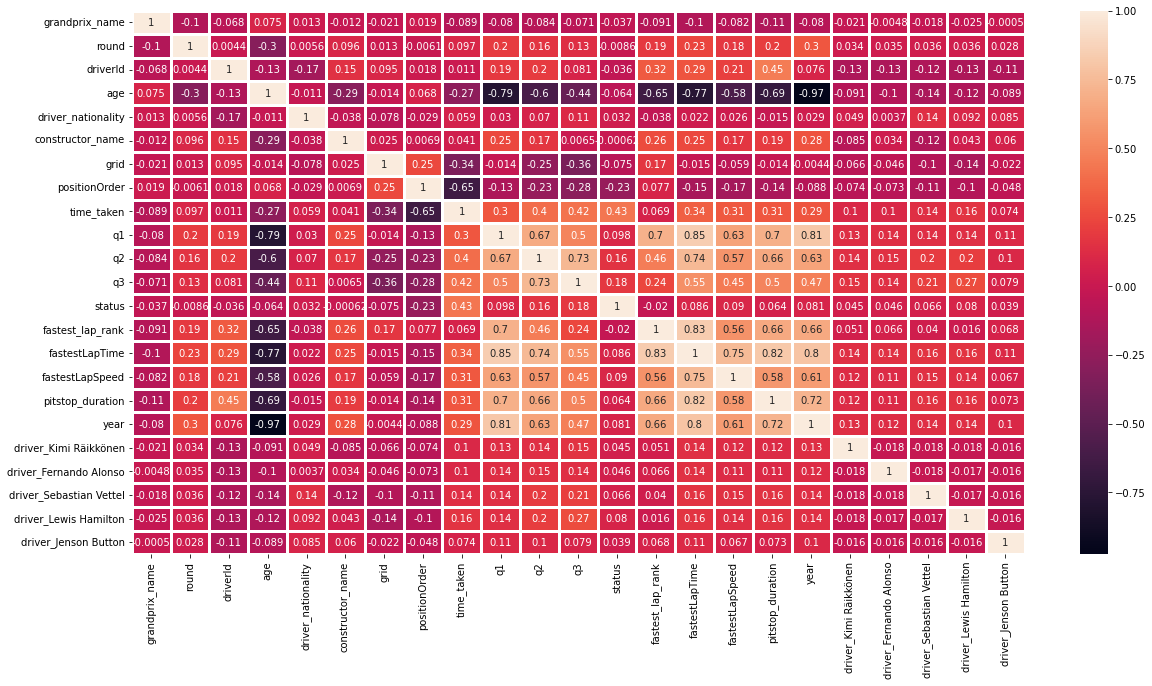

In [97]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_scaled.corr(), annot=True, linewidths=3.0)

## Step 4: Machine Learning Modelling

### Count of rows and columns 

In [98]:
print('train: rows & columns {}'.format(X_train_scaled.shape))
print('test: rows & columns {}'.format(X_test_scaled.shape))

train: rows & columns (20955, 23)
test: rows & columns (8981, 23)


In [99]:
print(X_train_scaled.shape)
print(type(X_train_scaled))
X_train_scaled[0:5]

(20955, 23)
<class 'pandas.core.frame.DataFrame'>


grandprix_name     round  driverId       age  driver_nationality  \
0       -1.195270 -0.697167 -0.288658  0.537824           -1.312147   
1       -0.971749  2.640088  1.776532 -1.174752           -0.977222   
2       -0.971749 -1.482403 -0.285289  0.627960           -0.977222   
3       -0.748228  1.462233 -0.895076 -0.363532           -0.642296   
4       -0.524707  0.676997 -0.271813  1.078637           -0.307371   

   constructor_name      grid  positionOrder  time_taken        q1  ...  \
0         -1.415268 -1.570553       1.608523   -0.665644 -0.900638  ...   
1         -0.890570 -1.009342       0.574187   -0.665644  1.110324  ...   
2         -1.415268 -0.588434      -0.804928    1.502304 -0.900638  ...   
3         -0.365873  0.814592       0.229408   -0.665644  1.110324  ...   
4         -0.365873 -1.149645       1.608523   -0.665644 -0.900638  ...   

   fastest_lap_rank  fastestLapTime  fastestLapSpeed  pitstop_duration  \
0         -0.657076       -0.786541        -0.588371         -0.647780   
1         -0.208003        1.271390         2.353250          1.543733   
2         -0.657076       -0.786541        -0.588371         -0.647780   
3          1.887670        1.271390         1.372709         -0.647780   
4         -0.657076       -0.786541        -0.588371         -0.647780   

       year  driver_Kimi Räikkönen  driver_Fernando Alonso  \
0 -0.584937              -0.134252               -0.132771   
1  1.386235              -0.134252               -0.132771   
2 -0.787109              -0.134252               -0.132771   
3  0.729178              -0.134252               -0.132771   
4 -0.837652              -0.134252               -0.132771   

   driver_Sebastian Vettel  driver_Lewis Hamilton  driver_Jenson Button  
0                -0.132212              -0.131463             -0.122539  
1                -0.132212              -0.131463             -0.122539  
2                -0.132212              -0.131463             -0.122539  
3                -0.132212              -0.131463             -0.122539  
4                -0.132212              -0.131463             -0.122539  

[5 rows x 23 columns]

In [100]:
print(X_test_scaled.shape)
print(type(X_test_scaled))
X_test_scaled[0:5]

(8981, 23)
<class 'pandas.core.frame.DataFrame'>


grandprix_name     round  driverId       age  driver_nationality  \
0       -0.524707 -0.304548  0.331236  1.529315           -0.307371   
1        1.263463 -0.697167  1.786639 -1.174752           -1.312147   
2        1.039941  2.247470 -0.952348 -0.769142            0.362480   
3       -0.971749  1.265924 -0.443631  0.357553            0.697406   
4        0.592899 -0.500858  0.166156  0.943434           -0.977222   

   constructor_name      grid  positionOrder  time_taken        q1  ...  \
0         -0.365873 -0.869040      -1.494485    1.502304 -0.900638  ...   
1          2.257613  0.113079       1.263744   -0.665644  1.110324  ...   
2         -0.365873  1.235500       0.229408   -0.665644  1.110324  ...   
3         -0.365873  0.954895      -0.460149   -0.665644 -0.900638  ...   
4         -0.365873 -0.728737       1.263744   -0.665644 -0.900638  ...   

   fastest_lap_rank  fastestLapTime  fastestLapSpeed  pitstop_duration  \
0         -0.657076       -0.786541        -0.588371         -0.647780   
1          2.037361        1.271390         0.392169          1.543733   
2          0.989525        1.271390         0.392169          1.543733   
3         -0.657076       -0.786541        -0.588371         -0.647780   
4         -0.657076       -0.786541        -0.588371         -0.647780   

       year  driver_Kimi Räikkönen  driver_Fernando Alonso  \
0 -1.494709              -0.134252               -0.132771   
1  0.981892              -0.134252               -0.132771   
2  0.931349              -0.134252               -0.132771   
3 -0.382766              -0.134252               -0.132771   
4 -1.090366              -0.134252               -0.132771   

   driver_Sebastian Vettel  driver_Lewis Hamilton  driver_Jenson Button  
0                -0.132212              -0.131463             -0.122539  
1                -0.132212              -0.131463             -0.122539  
2                -0.132212              -0.131463             -0.122539  
3                -0.132212              -0.131463             -0.122539  
4                -0.132212              -0.131463             -0.122539  

[5 rows x 23 columns]

### Modelling

#### Naïve Baseline Model

In [101]:
import numpy as np
from scipy import stats

# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

2.288916726318301
The train mean target value is 2.29.


In [102]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train_scaled.iloc[:,0]]
y_train_preds_naive[0:5]

[2.29, 2.29, 2.29, 2.29, 2.29]

In [103]:
# insert code here
y_test_preds_naive = [round(mean_target_value,2) for row in X_test_scaled.iloc[:,0]]
y_test_preds_naive[0:5]

[2.29, 2.29, 2.29, 2.29, 2.29]

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


The Naive Baseline Model's MSE on train data is 22.98.
The Naive Baseline Model's MSE on test data is 22.77.

The Naive Baseline Model's RMSE on train data is 4.79.
The Naive Baseline Model's RMSE on test data is 4.77.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


#### Linear Regression Model

In [105]:
linreg_ss = LinearRegression().fit(X_train_scaled, y_train)

y_train_preds_linreg_ss = linreg_ss.predict(X_train_scaled)
y_test_preds_linreg_ss = linreg_ss.predict(X_test_scaled)

In [106]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_mse_linreg_ss = mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's MSE on train data is {train_mse_linreg_ss:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_mse_linreg_ss = mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's MSE on test data is {test_mse_linreg_ss:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_rmse_linreg_ss = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinRegSS Model's RMSE on train data is {train_rmse_linreg_ss:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_rmse_linreg_ss = mean_squared_error(y_true, y_pred, squared=False)
print(f"The LinRegSS Model's RMSE on test data is {test_rmse_linreg_ss:.4f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_r2_linreg_ss = r2_score(y_true, y_pred)
print(f"The LinRegSS Model's R2 on train data is {train_r2_linreg_ss:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_r2_linreg_ss = r2_score(y_true, y_pred)
print(f"The LinRegSS Model's R2 on test data is {test_r2_linreg_ss:.2f}.")


The LinRegSS Model's MSE on train data is 7.8155.
The LinRegSS Model's MSE on test data is 7.8576.

The LinRegSS Model's RMSE on train data is 2.7956.
The LinRegSS Model's RMSE on test data is 2.8031.

The LinRegSS Model's R2 on train data is 0.66.
The LinRegSS Model's R2 on test data is 0.65.


<a id="bottom"></a>

## Report

### Table of Contents
#### 1. [Introduction with Value Based Problem Statement](#part1)
   - [1.1 Background](#part1.1)

#### 2. [Problem Formulation](#part2)
   - [2.1 Load and Explore the Data](#part2.1)
   - [2.2 Understand the Data](#part2.2)
   - [2.3 Formulate a Prediction Problem](#part2.3)
    
#### 3. [Data Wrangling on multiple tables](#part3)
   - [3.1 Extract and Create features from different tables](#part3.1)
   - [3.2 Concatenate, Merge or Join the tables](#part3.2)

#### 4. [Data Cleansing and Transformation](#part4)
   - [4.1 Outliers](#part4.1)
   - [4.2 Train and Test Split](#part4.2)
   - [4.3 Missing Value Imputation](#part4.3)
   - [4.4 Categorical Data](#part4.4)
   - [4.5 Numerical Data](#part4.5)
   - [4.6 Feature Scaling](#part4.6)

#### 5. [Machine Learning Model](#part5)
   - [5.1 Show Count of Rows and Columns](#part5.1)
   - [5.2 Naïve Baseline Model (Regression)](#part5.2)
   - [5.3 Linear Regression Model](#part5.3)

#### 6. [Summary and Further Improvements](#part6)
   - [6.1 Summarize Findings](#part6.1)
   - [6.2 Possible Further Improvements](#part6.2)
   
[Back to top (code)](#top)

## 1. Introduction with Value Based Problem Statement <a id="part1"></a>

### 1.1 Background <a id="part1.1"></a>

Machine Learning for Formula 1 is commonly used to deliver in-race predictions to fans of the Formula 1 race. F1 enables fans to comprehend how drivers make split-second decisions and how teams develop and implement race strategies in real time that could impact the outcome of a race by using distinct data points to inform each insight.

This dataset was adapted from Ergast.com, a webservice that provides a database of Formula 1 races. The dataset consists of Formula 1 races data from 1950 season to 2022 season. It contains information about all Formula 1 races, including lap times, pit stops, final results, etc. 

I am tasked to gain insight on the 13 'f1_db_csv' files with a data dictionary comprising the description of columns of all 13 tables. After analysing the dataset, tables useful for solving prediction problem are extracted. After tables are extracted, merging is carried out to create a tabular data table. The final table will be wrangled and used for building of machine learning model. 

## 2. Problem Formulation <a id="part2"></a>

### 2.1 Load and Explore the Data <a id="part2.1"></a>

The dataset comprises of 13 csv files/tables. Out of the 13 csv files/tables given, 7 csv files/tables will be utilised which are 'results', 'races', 'drivers', 'pit_stops' as 'pit', 'constructors', 'qualifying' and 'status'. The final tabular data table will consist of the above 7 csv files/tables stated. 

The first 5 records are displayed using df.head() function.

The info() function is used to show the information of the dataframe, the number of variables and data type of each variable. The dataset comprises of 29936 rows and 33 columns, with data in integer, float and object format. The state of the data is not clean with null values present. The columns that have null values are 'date', 'lap', 'duration', 'q1', 'q2' and 'q3'. Missing value imputation will be done for these columns in the later part. df.info() shows that among the 12 features, there are 11 numerical and 22 categorical variables. 

A backup copy of the dataframe is created as 'df_bckup'. The copy() method helps keep the original dataframe as a backup in case of any irrevocable changes. 

### 2.2 Understand the Data <a id="part2.2"></a>

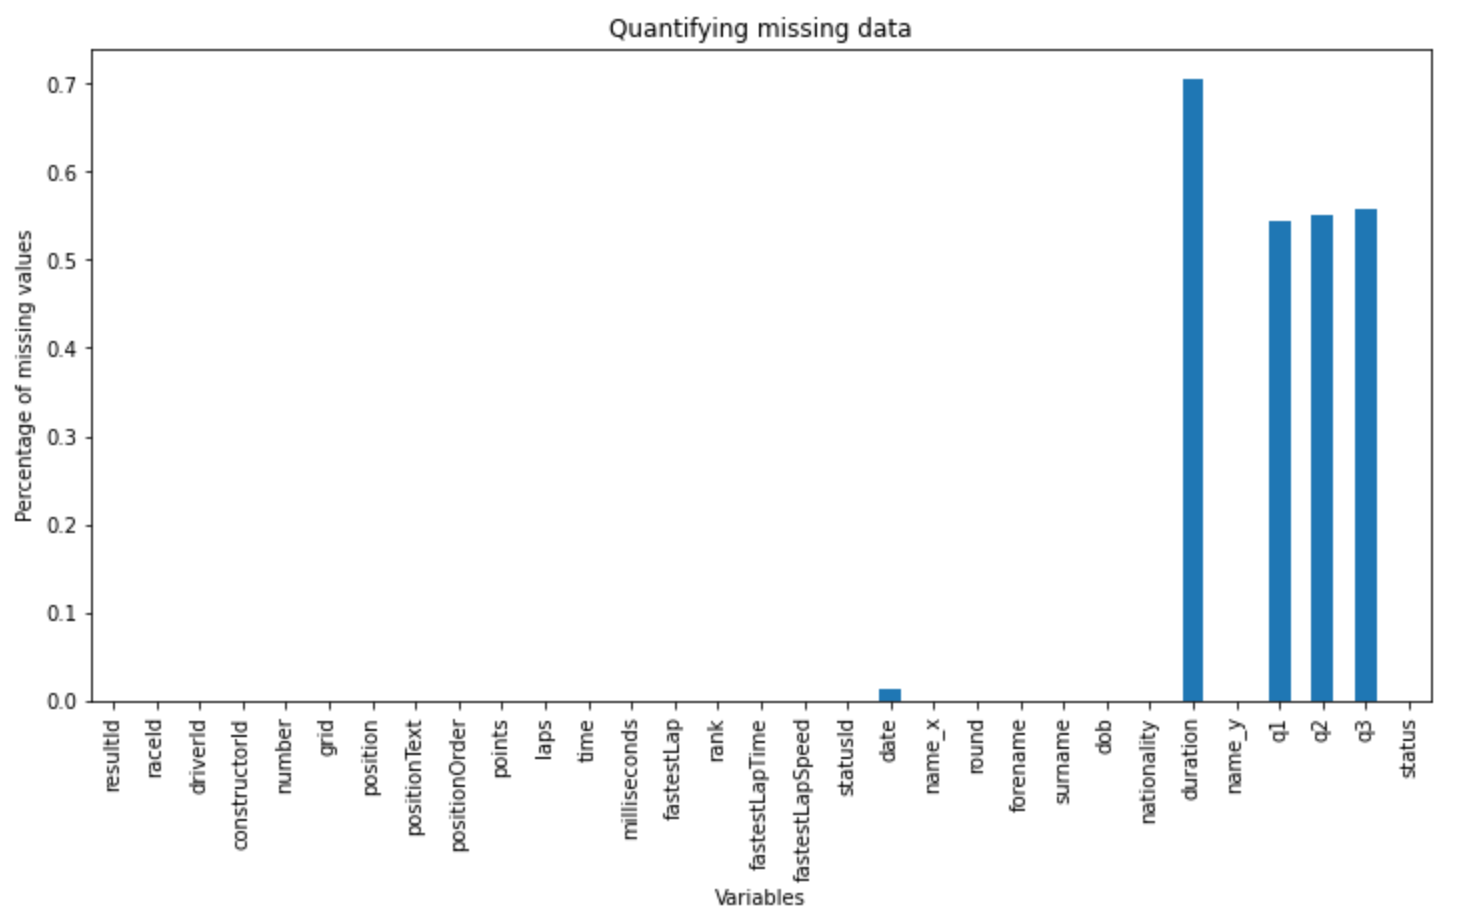

The bar chart shows the percentage of missing values of the variables. Missing values are present in 'date', 'duration', 'q1', 'q2' and 'q3'. It is observed that 'duration' has the highest percentage of missing values. 

Missing value imputation will be carried out to replace the missing values to a suitable value. Replacing the missing values helps to retain most of the information in the dataset which would be preferred over removing the NaNs as removing NaNs reduces the dataset size and may lead to biasness in the result. 

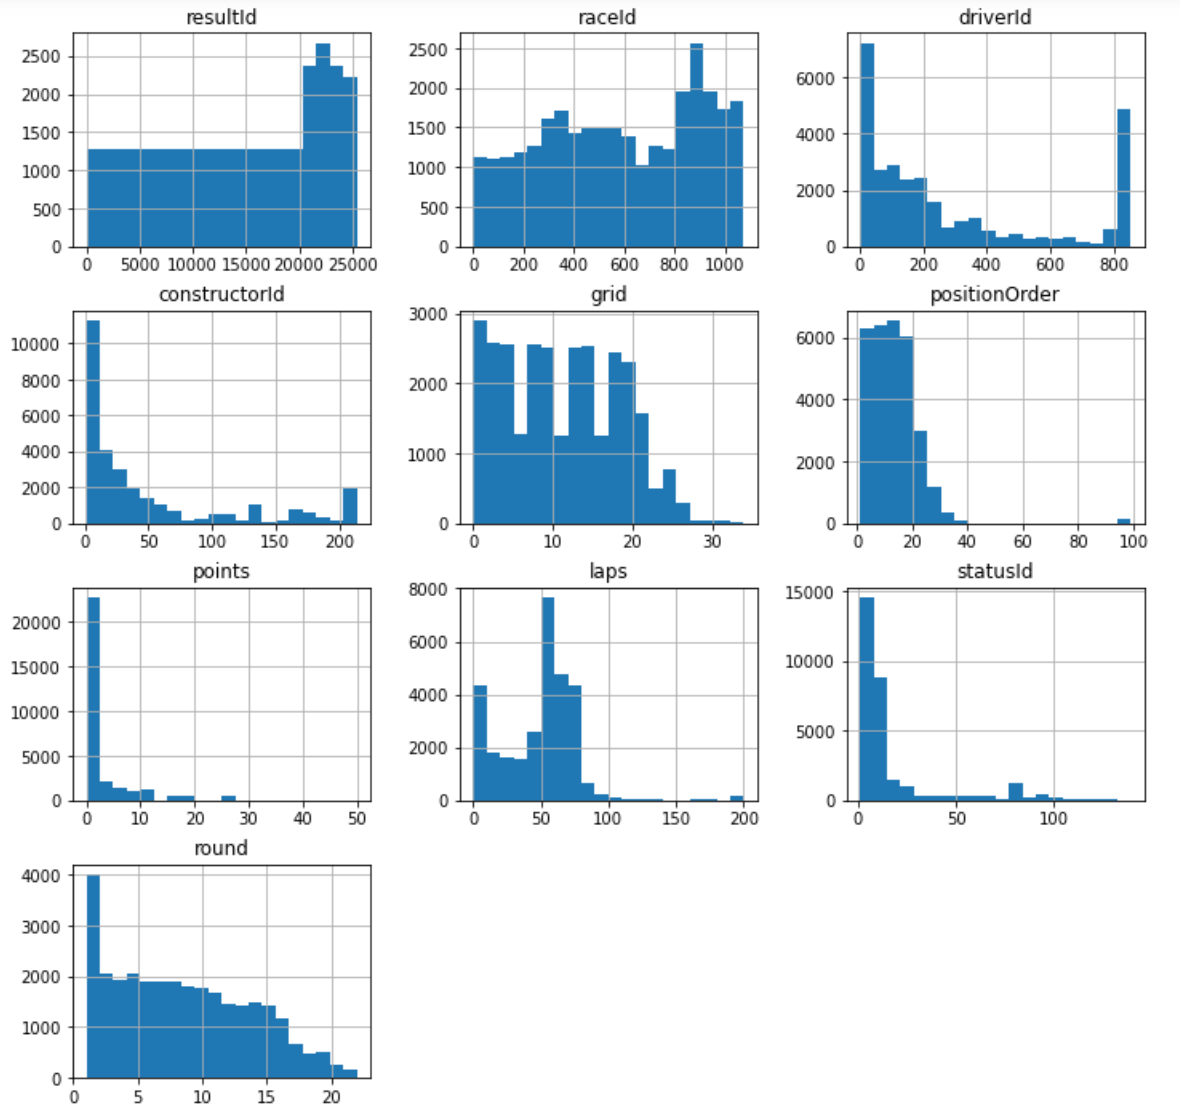

The histograms show the distribution of all numerical variables. It is observed that all the numerical variables do not have a normal distribution. Most the numerical variables show a right skewed distribution and some shows a random distribution. 

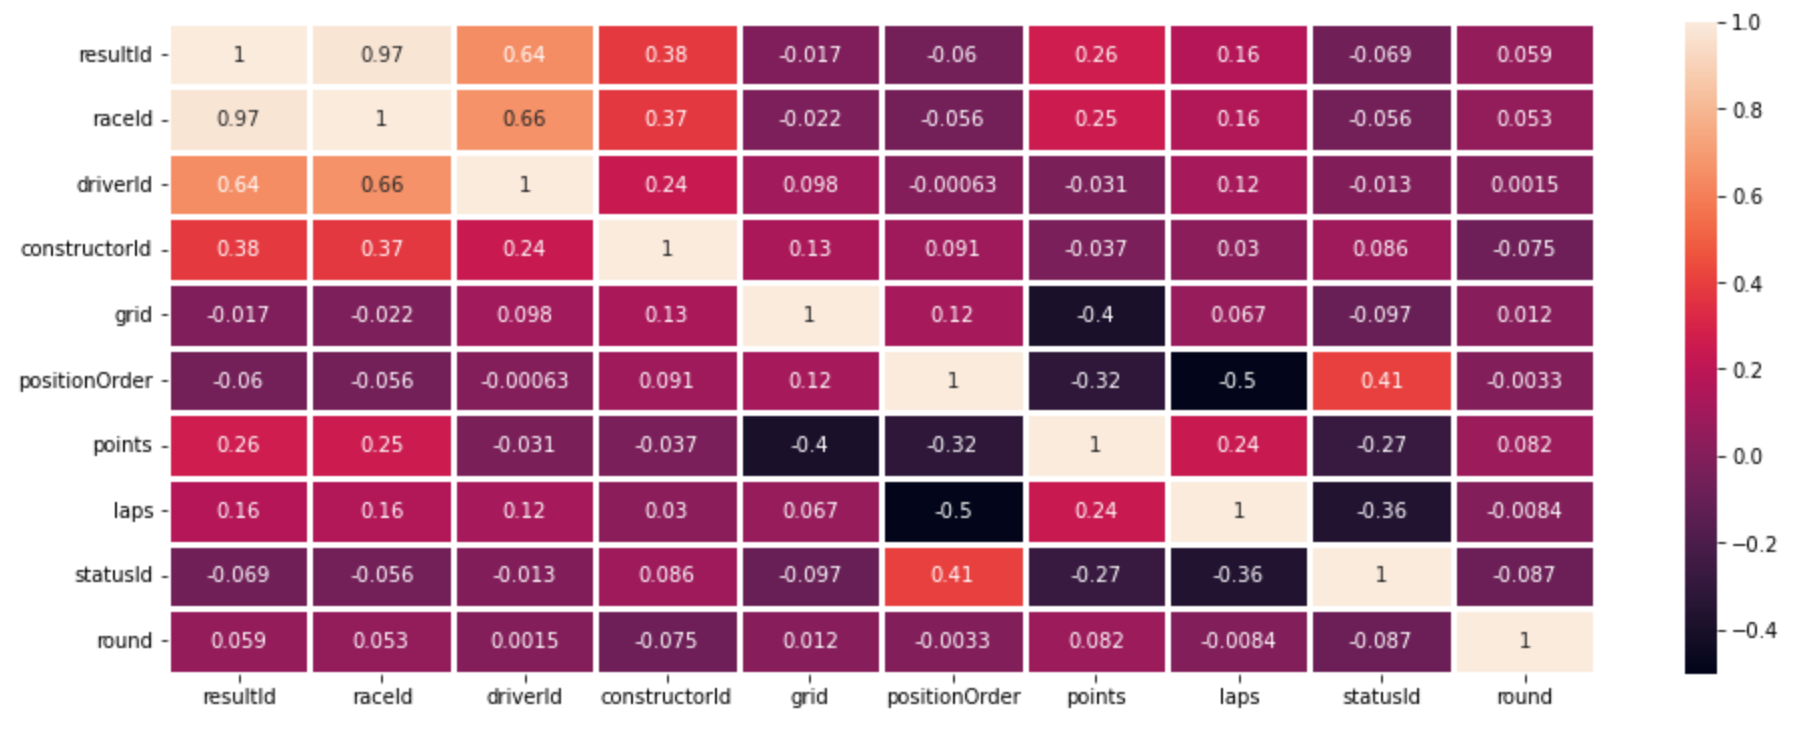

The heatmap shows the correlation between the different numerical variables in the dataset. It shows that 'raceId' has a high positive correlation with 'resultId' of 0.97 as compared to the other variables. 

### 2.3 Formulate a Prediction Problem <a id="part2.3"></a>

My prediction problem is to find out the possible factors affecting the chances of winning the Formula 1 race. 

Some possible factors could be: 

Age: as age increases, racers performance may decrease, there could be a peak time where racers performance are the best

Pit stops: estimate the number of pit stops per race and its impact on racers' performance based on past records

Grand prix location: the grand prix location of the race would provide home field advantage to drivers if he is trained in the same place as the race as they would be more familiar with the race track

Lap times: the average lap times could provide insights for race performance

Qualifying format: further insight on performance could be obtained based on the races that determine the start position of the actual races

Hot streaks: with past victories, racers may have a better momentum, increasing their chance of winning

## 3. Data Wrangling on multiple tables <a id="part3"></a>

### 3.1 Concatenate, Merge or Join the tables <a id="part3.1"></a>

The final tabular data table was formulated using a left merge between the 7 tables selected. Merge was preferred over join as it is more versatile and allows us to specify columns beside the index to join on for both dataframes. 

First, left merge was done on the 'results' and 'races' tables whereby all the data in 'results' table are combined with selected variables 'raceId', 'date', 'name' and 'round' of races table on 'raceId'.

Next, another left merge was used to merge the merged dataframe done previously with 'drivers' table, 'driverId', 'forename', 'surname', 'dob' and 'nationality' on 'driverId'. 

Then, with the merged dataframe, another left merge was used to merge with 'pit' table, 'raceId', 'driverId' and 'duration' on 'raceId' and 'driverId'. 

After, another left merge was used to merge the merged dataframe with 'constructors' table, 'constructorId' and 'name', on 'constructorId'. 

Next, a left merge was used to merge the merged dataframe with selected variables 'raceId', 'driverId', 'constructorId', 'q1', 'q2' and 'q3' of qualifying table on 'raceId', 'driverId' and 'constructorId'. 

Lastly, left merge was used to merge the merged dataframe with 'status' table, 'statusId' and 'status', on 'statusId'.

### 3.2 Extract and Create features from different tables <a id="part3.2"></a>

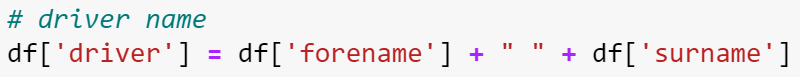

The new variable 'driver' is derived using concatenation of 'forename' + ' ' + 'surname'. The driver name is used for identification purposes. 

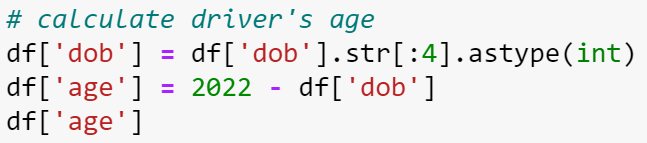

A new variable 'age' is added which represents the driver's age. Indexing str[:4] is used to extract the last four characters of the value in 'dob' which is the year. Then, I converted the data type to integer. The age is derived by substracting the year taken from 'dob' from this year 2022. 

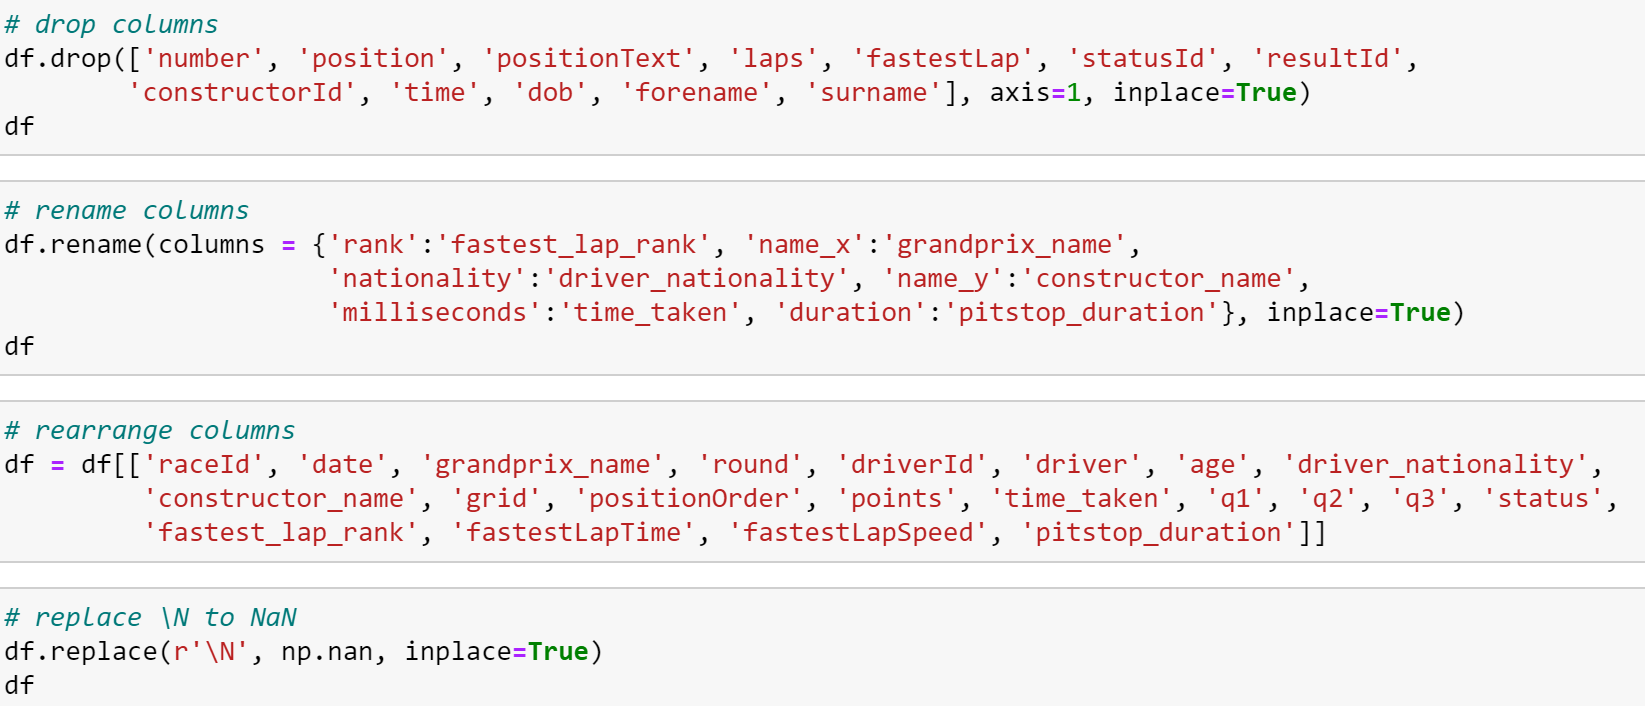

Dropping of unnecessary columns, renaming of columns and rearrangement of columns are done. 

All the '\N' in the dataset are replaced to 'NaN' to represent the missing values in the dataframe. 

During exploration of the dataset, it is observed that the 'date' variable under 'race' table has incorrect format of years and blanks shown. Blank dates are filtered to get the corresponding 'raceId' which will be used for filling of the blanks in the later part. 

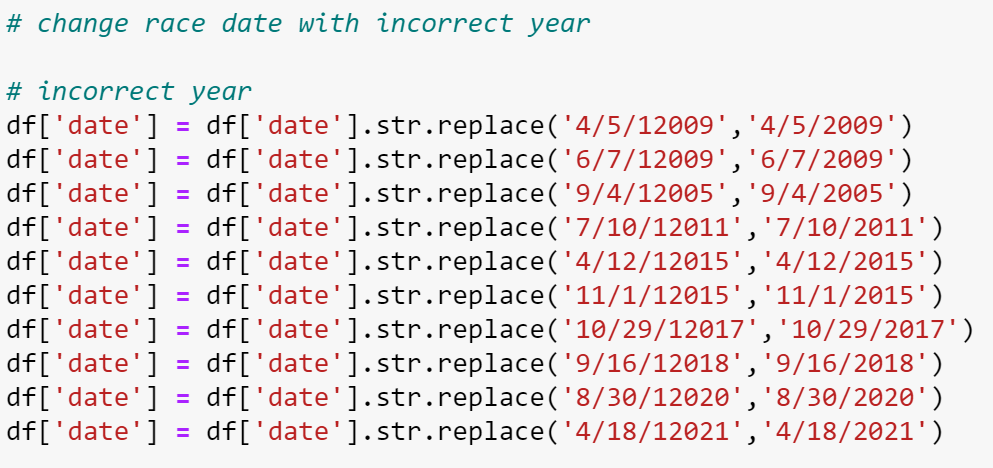

To replace the incorrect year format, replace() method is used. 

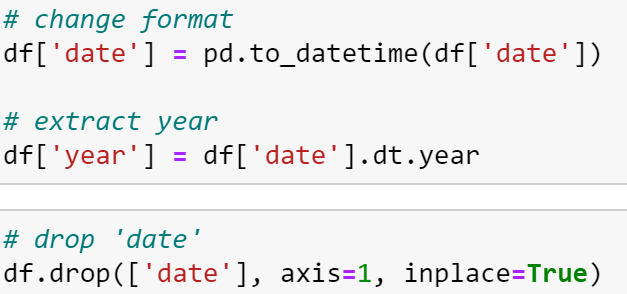

The 'date' variable is converted to datetime format and year is then extracted from the 'date' variable using dt.year, forming a new variable 'year'. Afterwards, the 'date' variable will be dropped. 

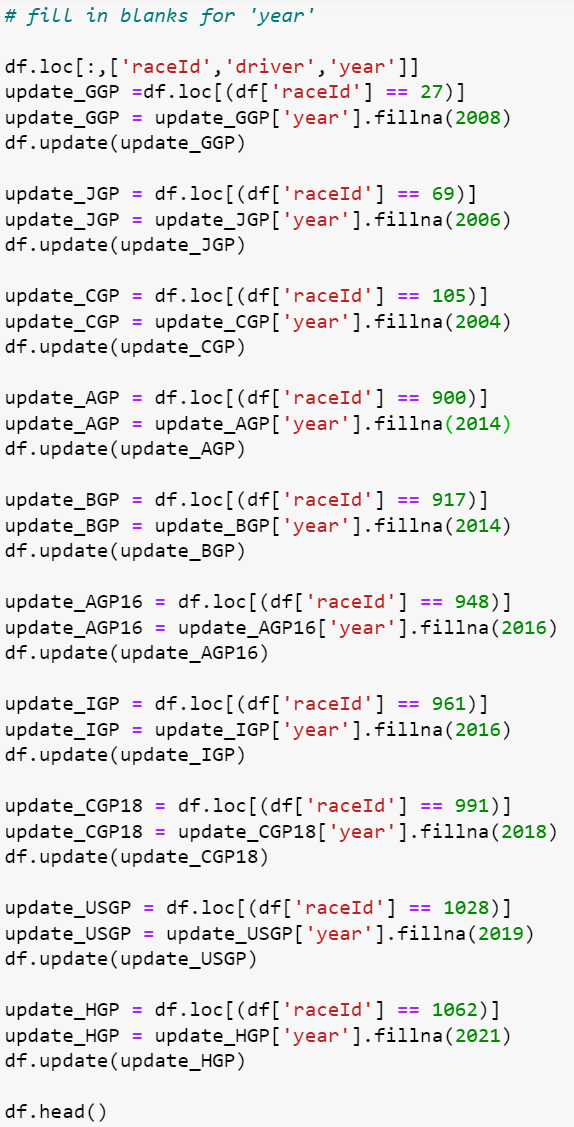

The blanks shown in the variable 'date' under 'race' table will be filled with the correct year format based on the url provided in the excel with details about the grand prix. df.loc is used to locate the 'raceId', 'driver', and 'year'. The corresponding 'raceId' of the 'year' with blanks are located and then replaced with the correct years found in the url and updated in the dataframe. 

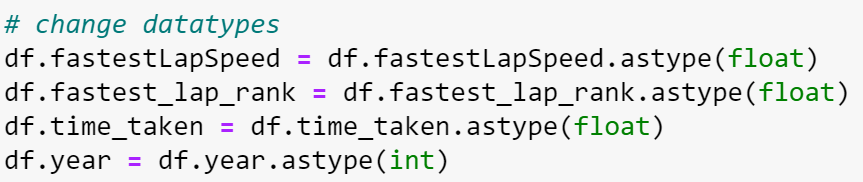

Data types of 'fastest_lap_rank', 'fastestLapSpeed', 'time_taken' are converted from object to float format. 
Data type of 'year' is converted from object to integer format. 

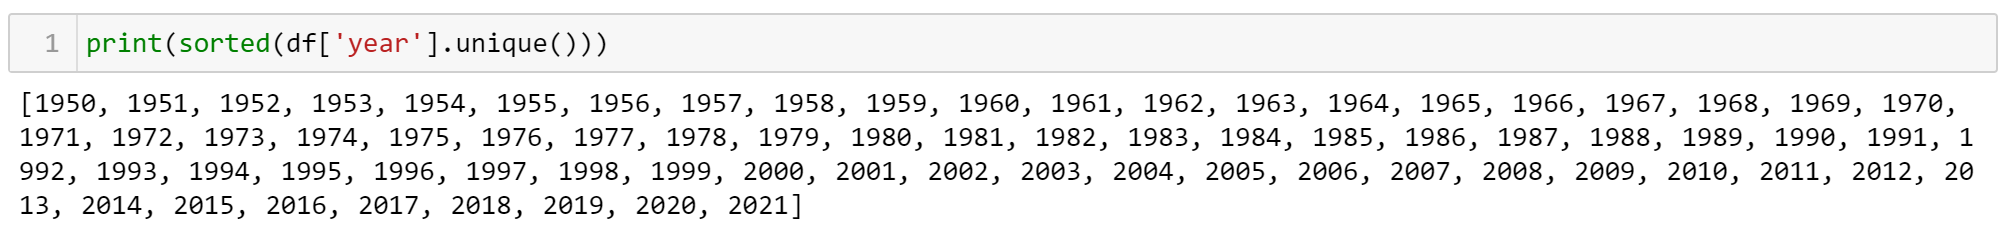

Unique values in 'year' are sorted in ascending order and displayed. 

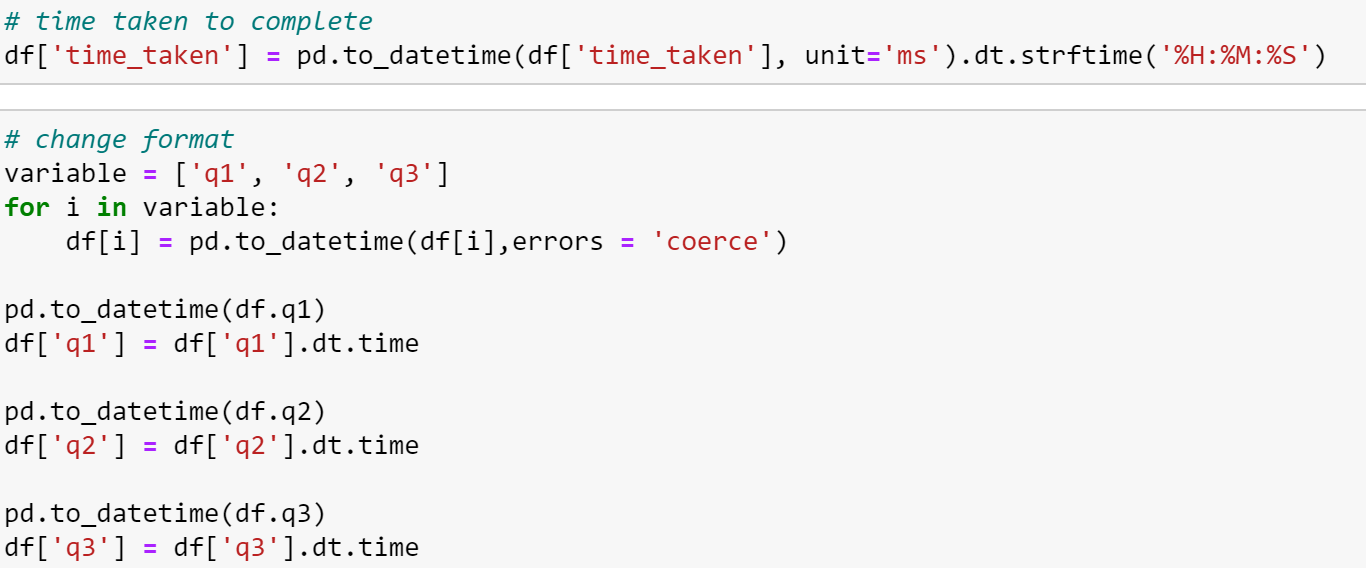

The variable 'time_taken' is converted to datetime format and displayed in the format '%H:%M:%S'. 

The variables 'q1', 'q2', 'q3' are converted to datetime format and the time is extracted using dt.time. 

## 4. Data Cleansing and Transformation <a id="part4"></a>

### 4.1 Outliers <a id="part4.1"></a>

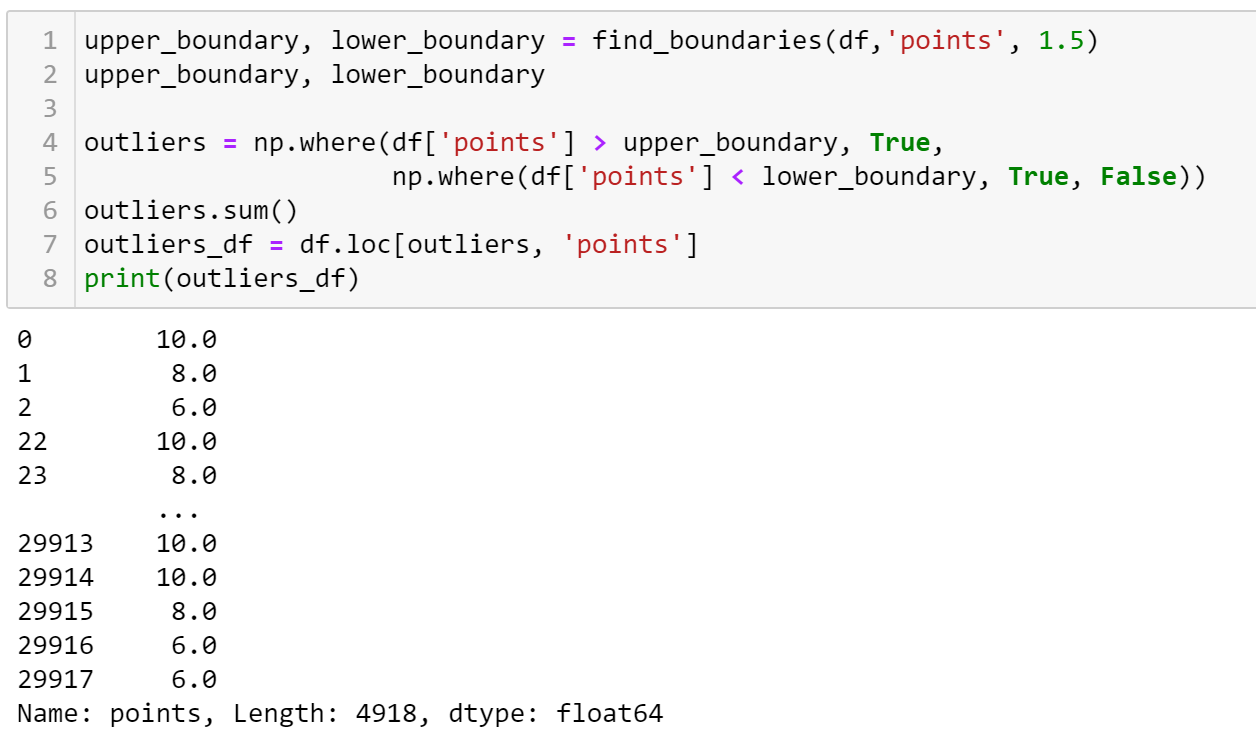

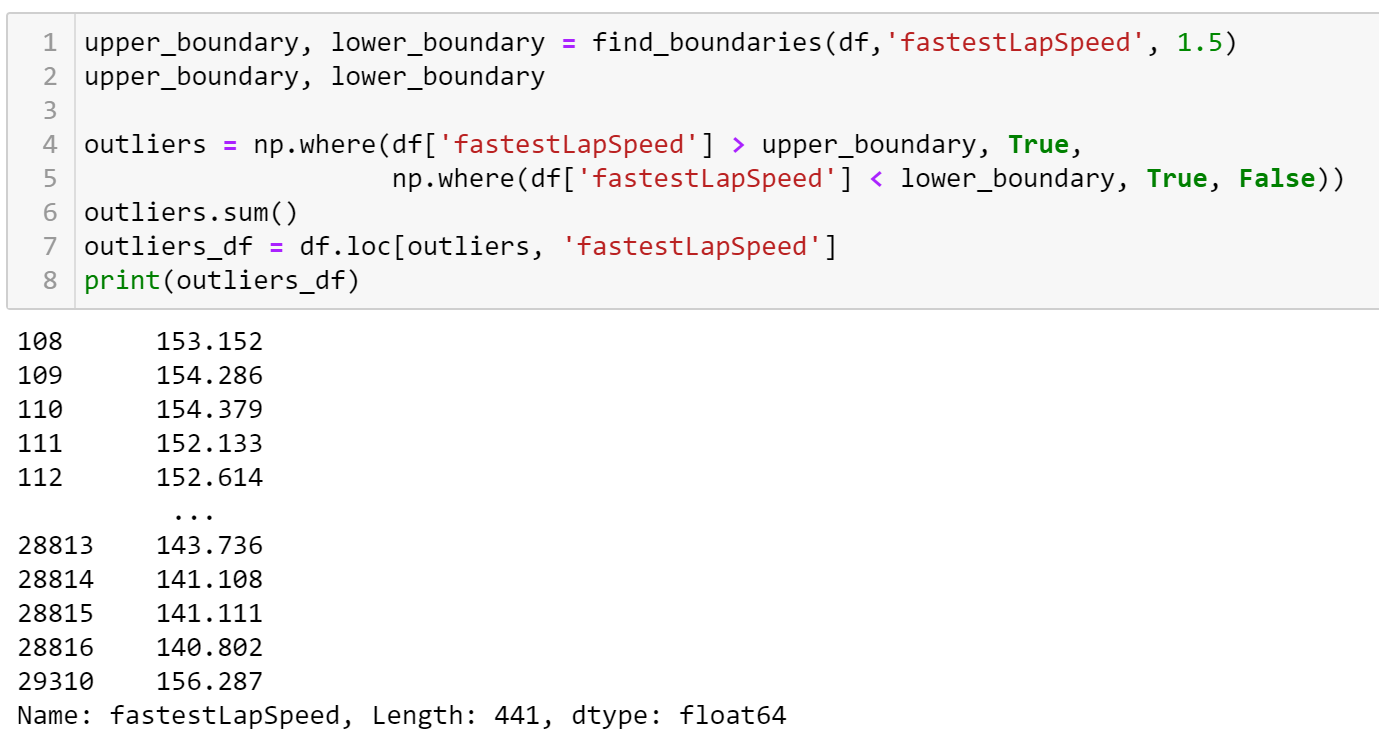

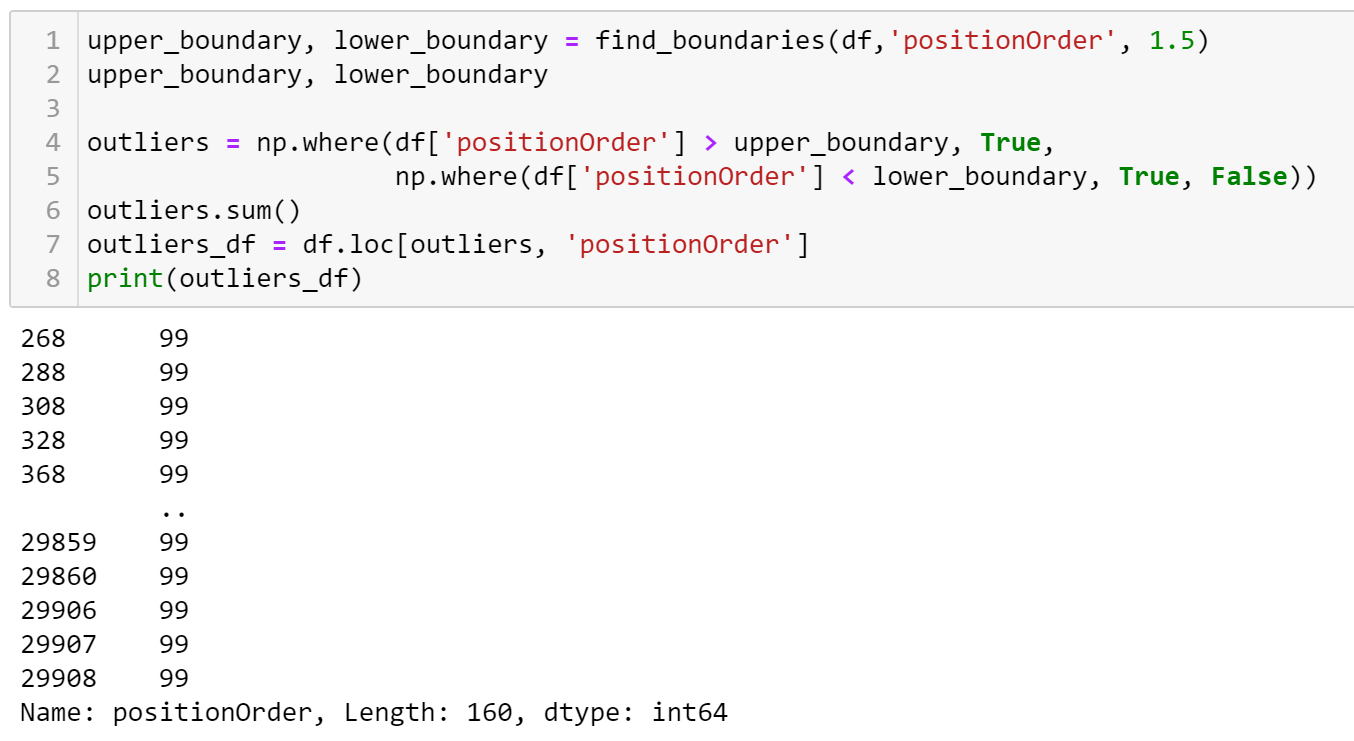

I checked for the presence of outliers in the numerical variable. Outliers are present in 'point', 'fastestLapSpeed', 'positionOrder'. Outliers represent natural variations in the data. As it is normal for these variables to have outliers, handling of outliers is not necessary. 

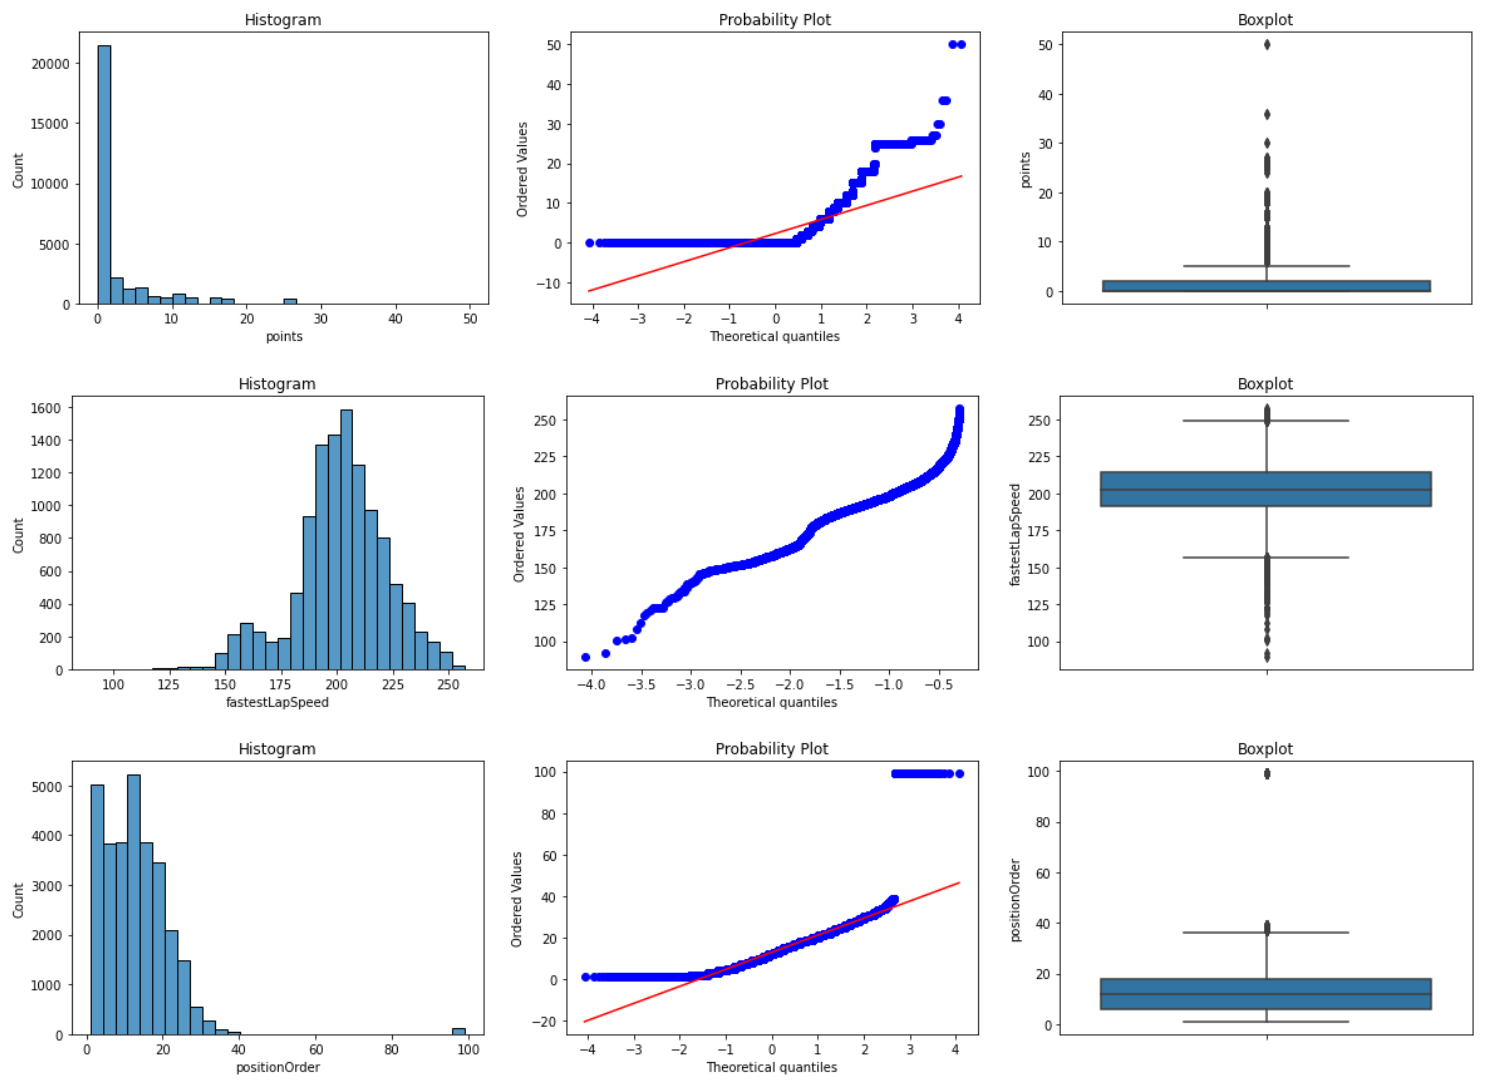

The image above shows the distribution of the variables 'points', 'fastestLapSpeed' and 'positionOrder' using a histogram, Q-Q plot and box plot. 

Both 'points' and 'positionOrder' shows a right skewed distribution with outliers present. 

### 4.2 Train and Test Split <a id="part4.2"></a>

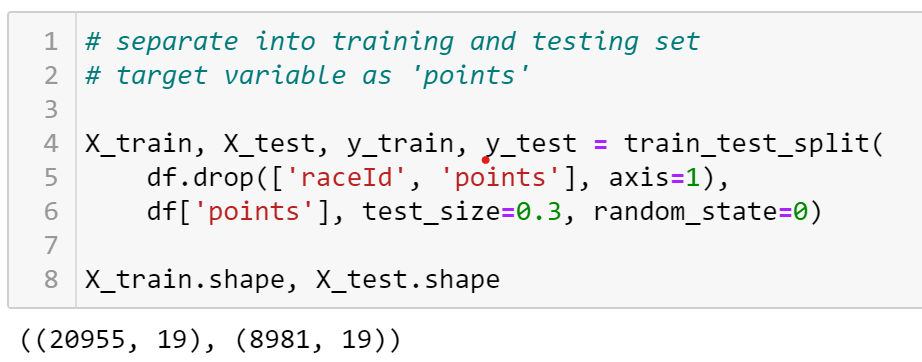

For the train test split, the ratio for train and test data are 70% and 30% respectively.
'points' is dropped as it is the target variable. 'raceId' is a unique identifier of a race which does not affect the points. 'raceId' is also dropped in the train test split as it is not really useful in the prediction of factors affecting the win rate of Formula 1 race. 

### 4.3 Missing Value Imputation <a id="part4.3"></a>

After the train test split is done, missing value imputation is carried out. 

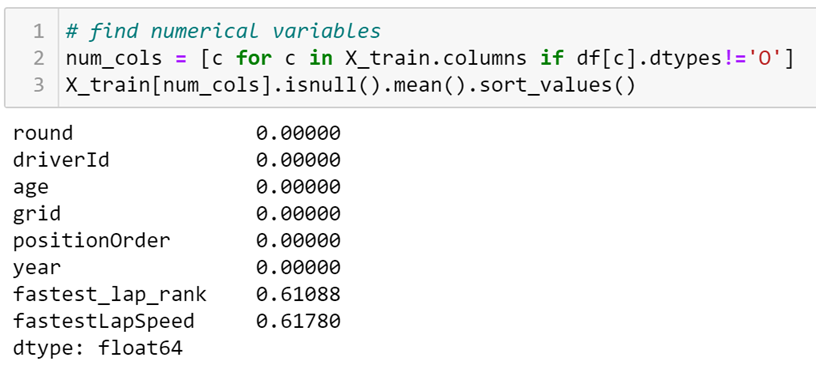

There are missing values in variables 'fastest_lap_rank' and 'fastestLapSpeed' which can been seen using X_train[num_cols].isnull().mean().sort_values(). 

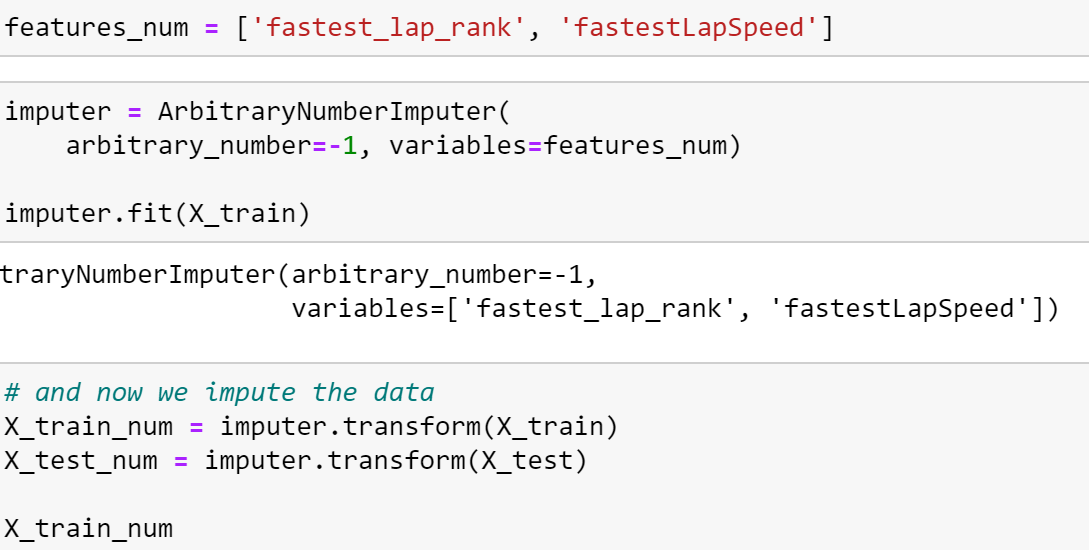

Missing value imputation should be done after train test split to prevent leakage of data from the test set. 

Arbitrary value imputation is carried out whereby missing values in numerical variables ‘ fastest_lap_rank’ and ‘fastestLapSpeed’ are imputed with arbitrary value -1. 

This method is used as the percentage of missing data is high and the data is not missing at random. 

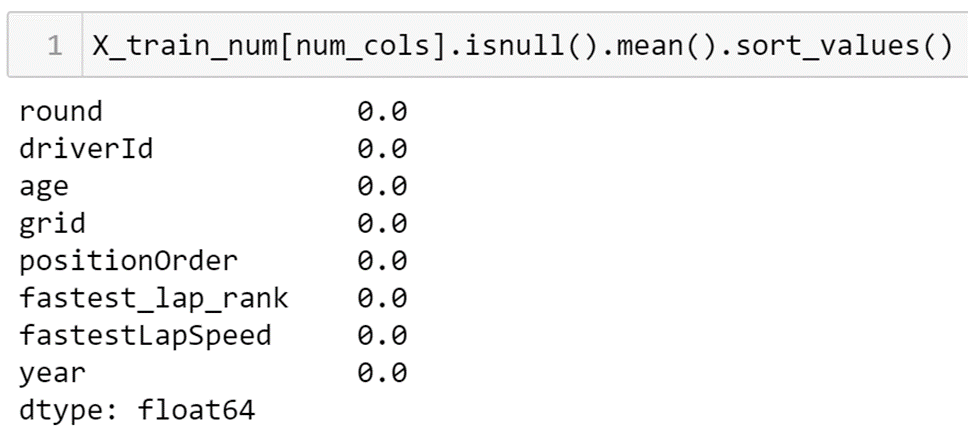

It shows that there are no more null values present in the numerical variables.

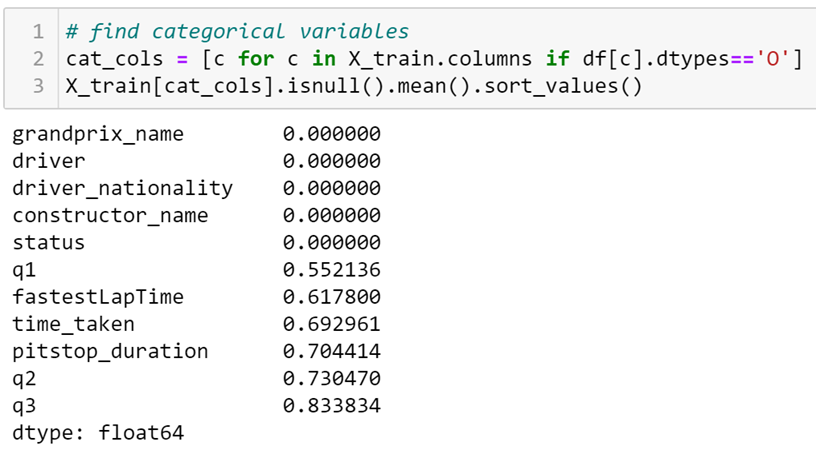

There are missing values in variables 'q1', 'fastestLapTime', 'time_taken', 'pitstop_duration', 'q2' and 'q3' which can been seen using X_train[cat_cols].isnull().mean().sort_values(). 

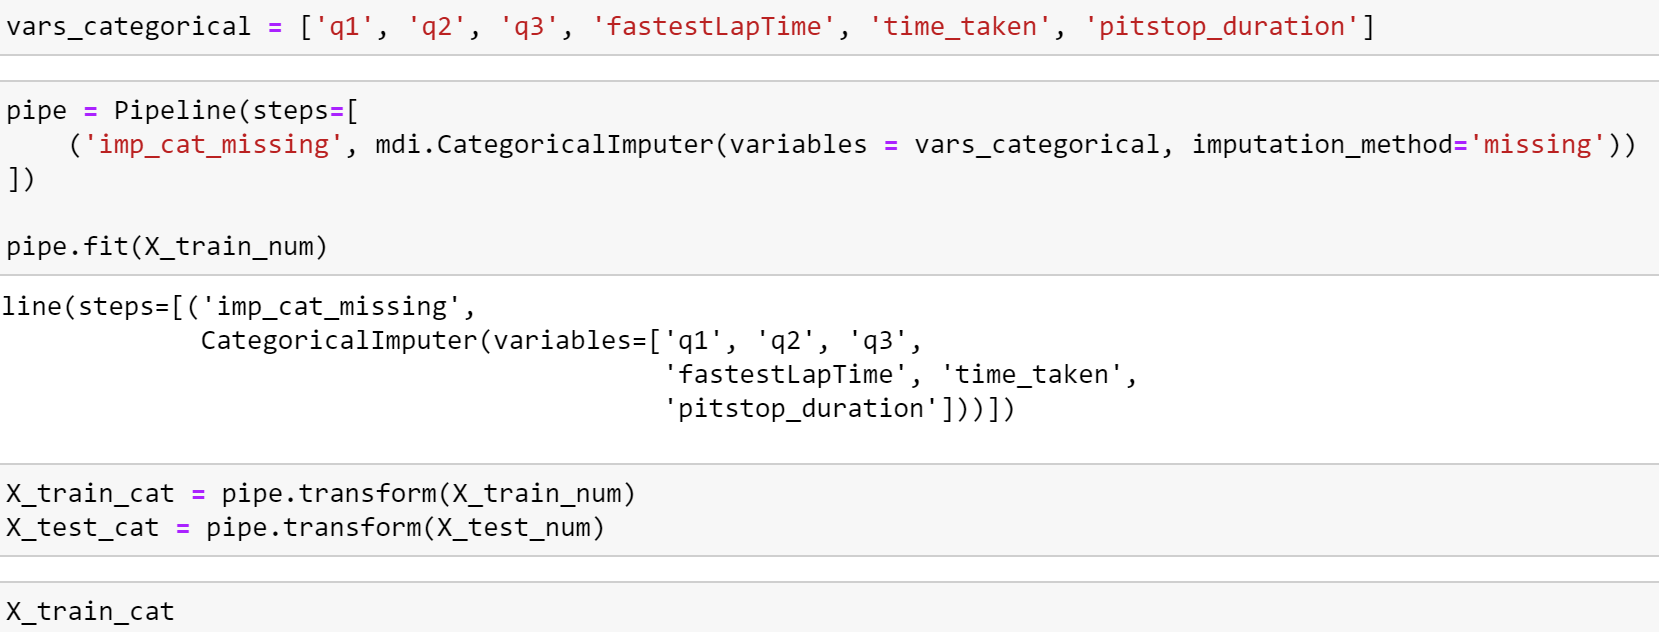

Missing imputation is carried out wherby missing values in categorical variables 'q1', 'fastestLapTime', 'time_taken', 'pitstop_duration', 'q2' and 'q3’ are imputed with ‘missing’. 

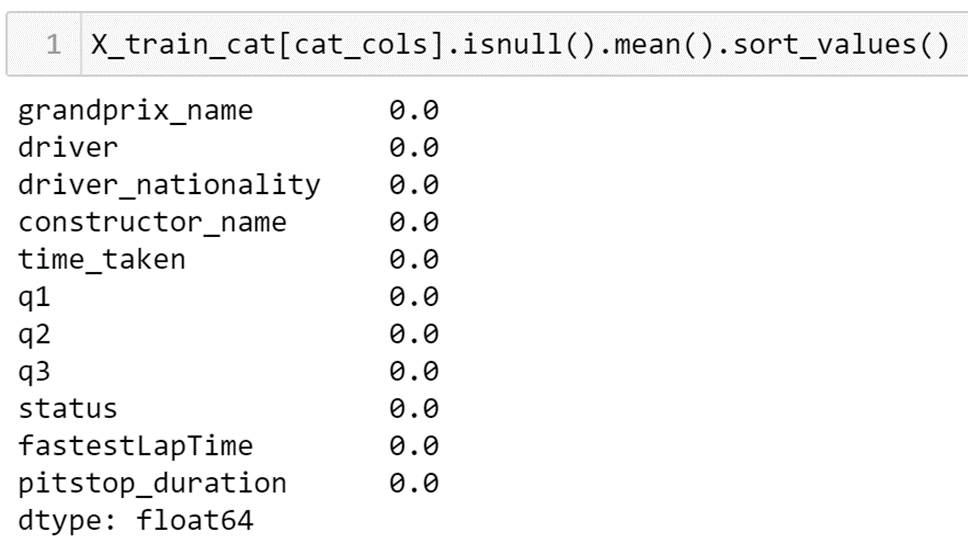

It shows that there are no more null values present in the categorical variables. 

### 4.4 Categorical Data <a id="part4.4"></a>

#### One Hot Encoding

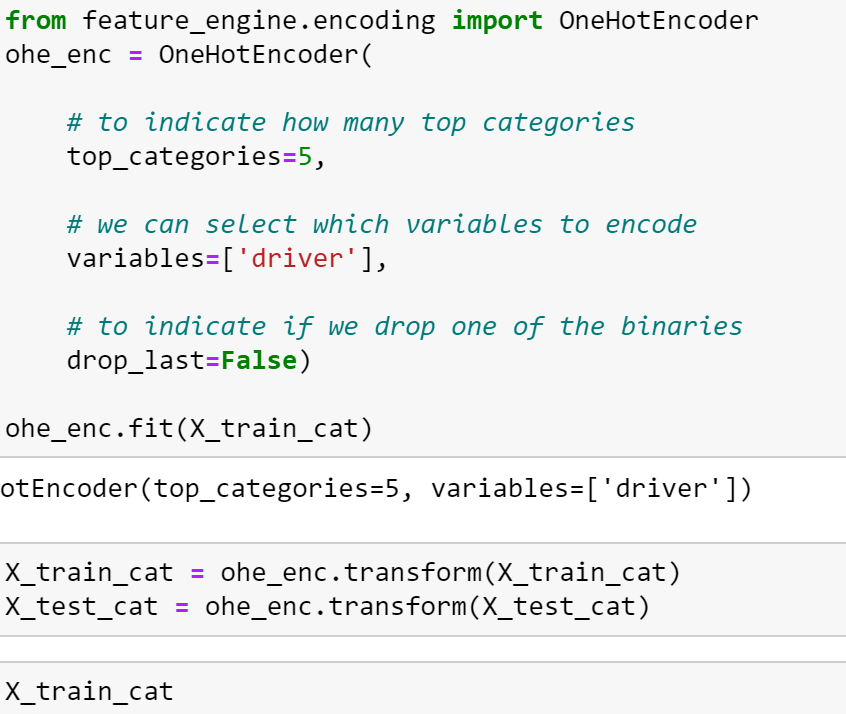

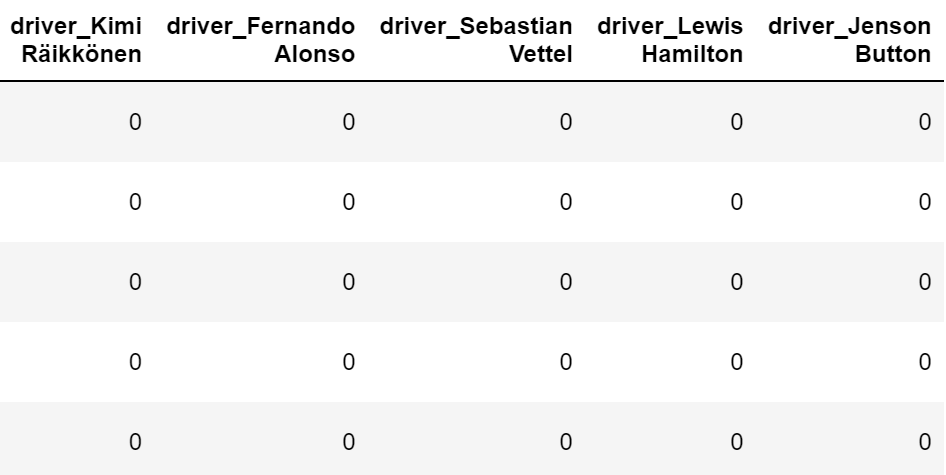

One hot encoding of frequent categories is performed as one hot encoding of highly cardinal variables can expand the feature space. This method helps to reduce the number of binary variables as compared to one hot encoding. 

This encoding method is used for the variable 'driver'. Only the top 5 most frequent labels will stored. It is observed that Kimi Räikkönen, Fernando Alonso, Sebastian Vettel, Lewis Hamiltion and Jenson Buttom are the most frequent labels. 

#### Rare Encoding

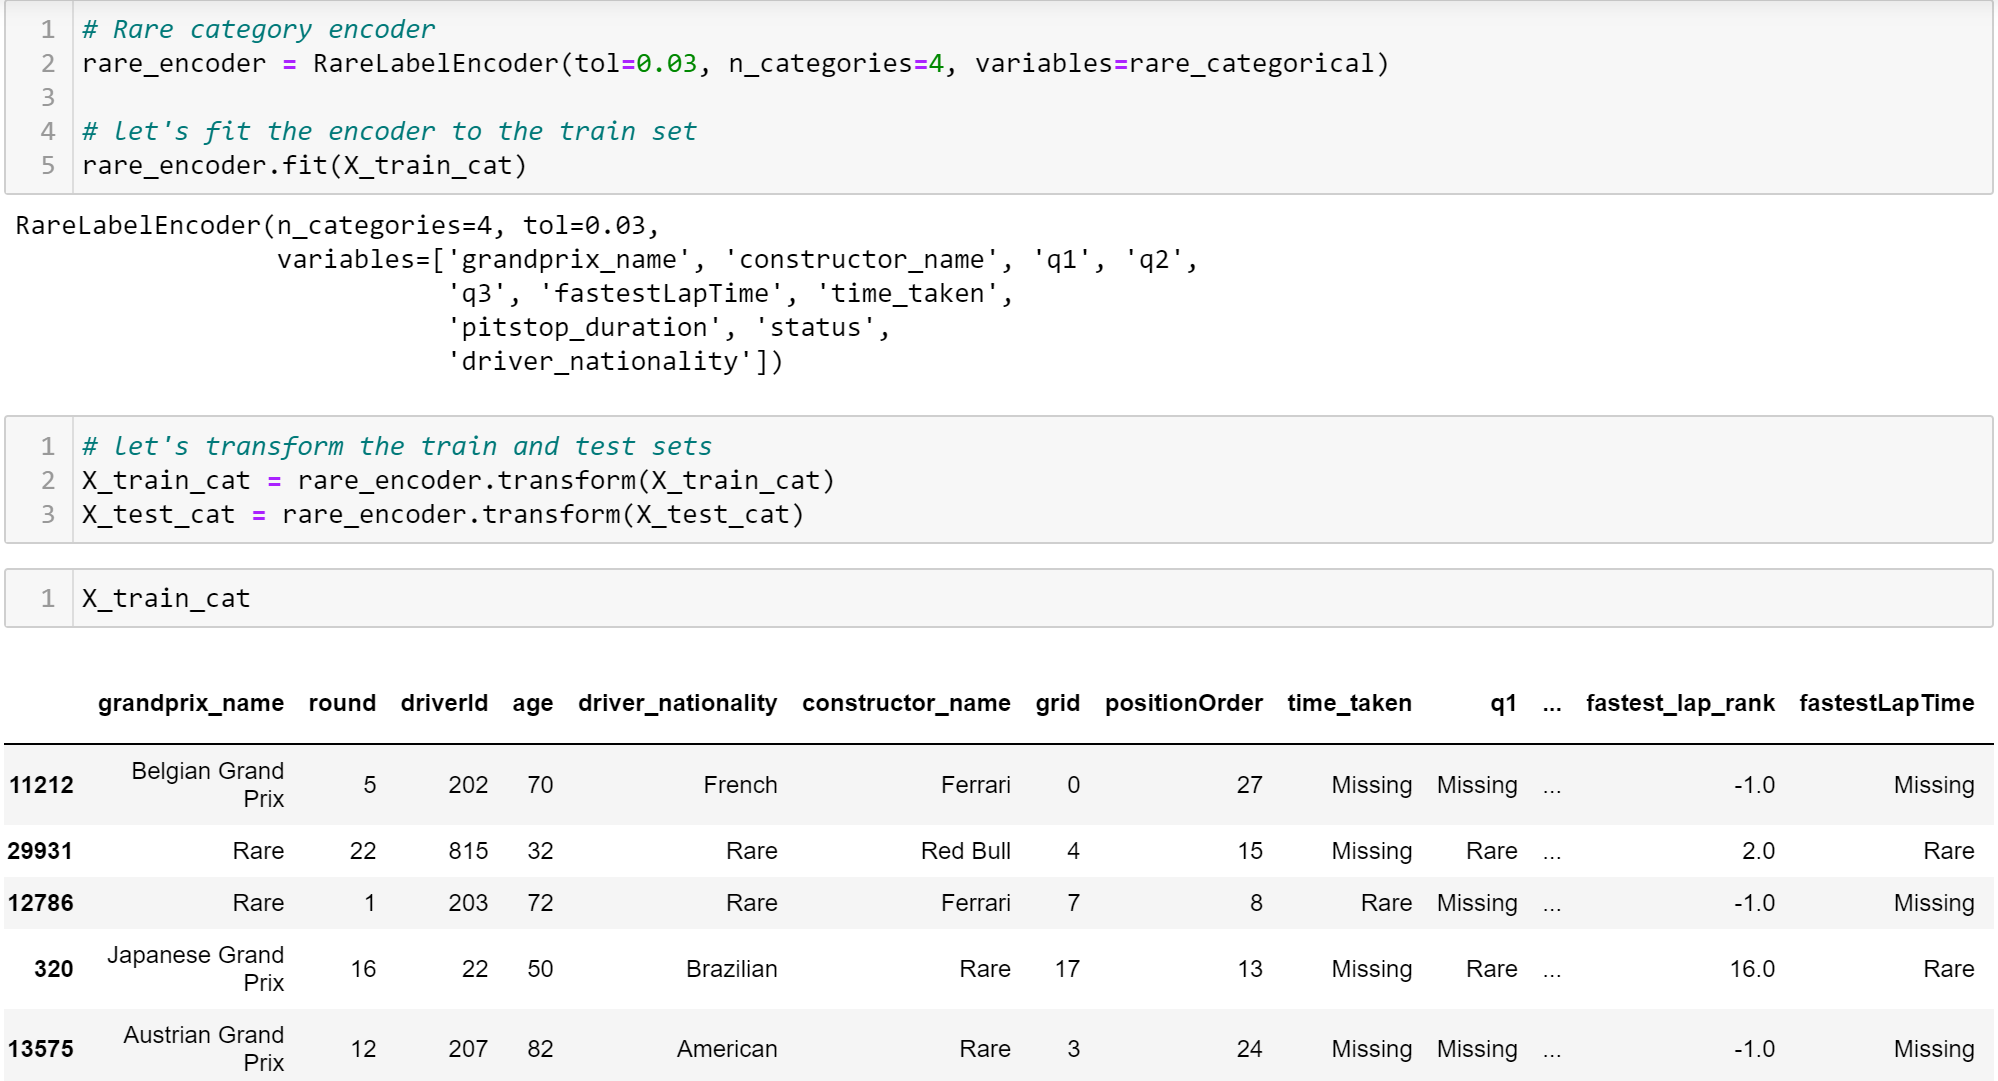

Rare encoding is conducted for the variables 'grandprix_name', 'constructor_name', 'q1', 'q2', 'q3', 'fastestLapTime', 'time_taken', 'pitstop_duration', 'status' and 'driver_nationality'. This method is used to group infrequent categories into a new category 'Rare'. 

#### Count Encoding

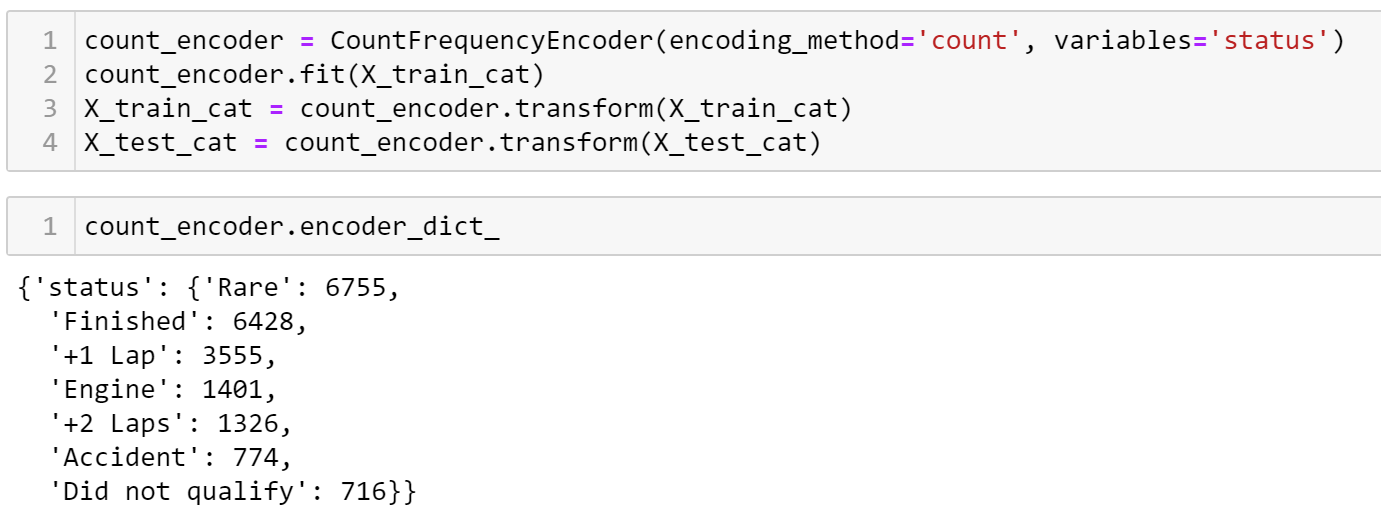

Count encoding is used to replace the categories with the count based on 'status'. 'status' has many types of attributes therefore count encoding is used. Count encoding includes additional information such as the frequency of occurrence while label encoding shows the index of the label. Thus, count encoding is preferred over label encoding. 

#### Ordinal Encoding

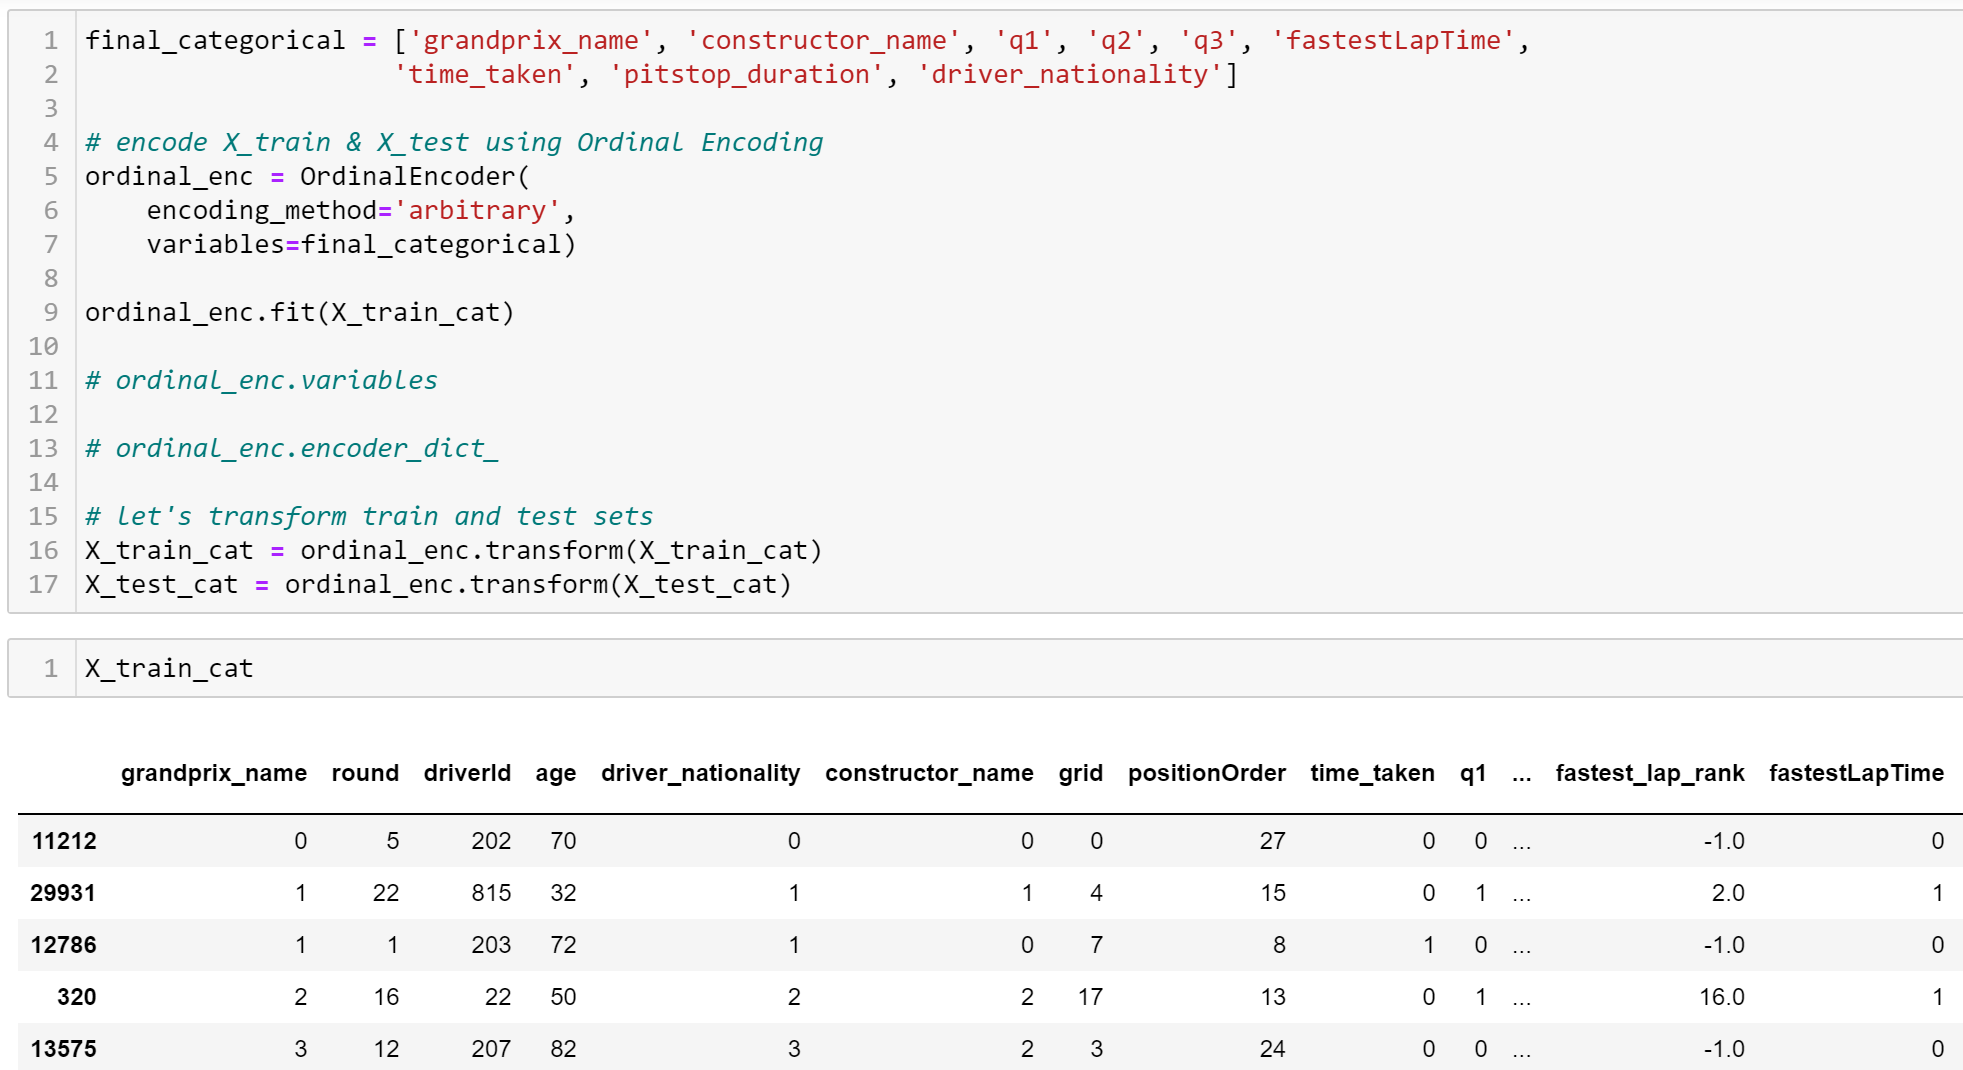

For Ordinal encoding, each category in the variable is translated into a number. Ordinal encoding is conducted for the variables 'grandprix_name', 'constructor_name', 'q1', 'q2', 'q3', 'fastestLapTime', 'time_taken', 'pitstop_duration', and 'driver_nationality'. This method is suitable for ordinal variables, which are categorical variables with a specific order. 

### 4.5 Numerical Data <a id="part4.5"></a>

#### Power Transformation

Before transformation: 
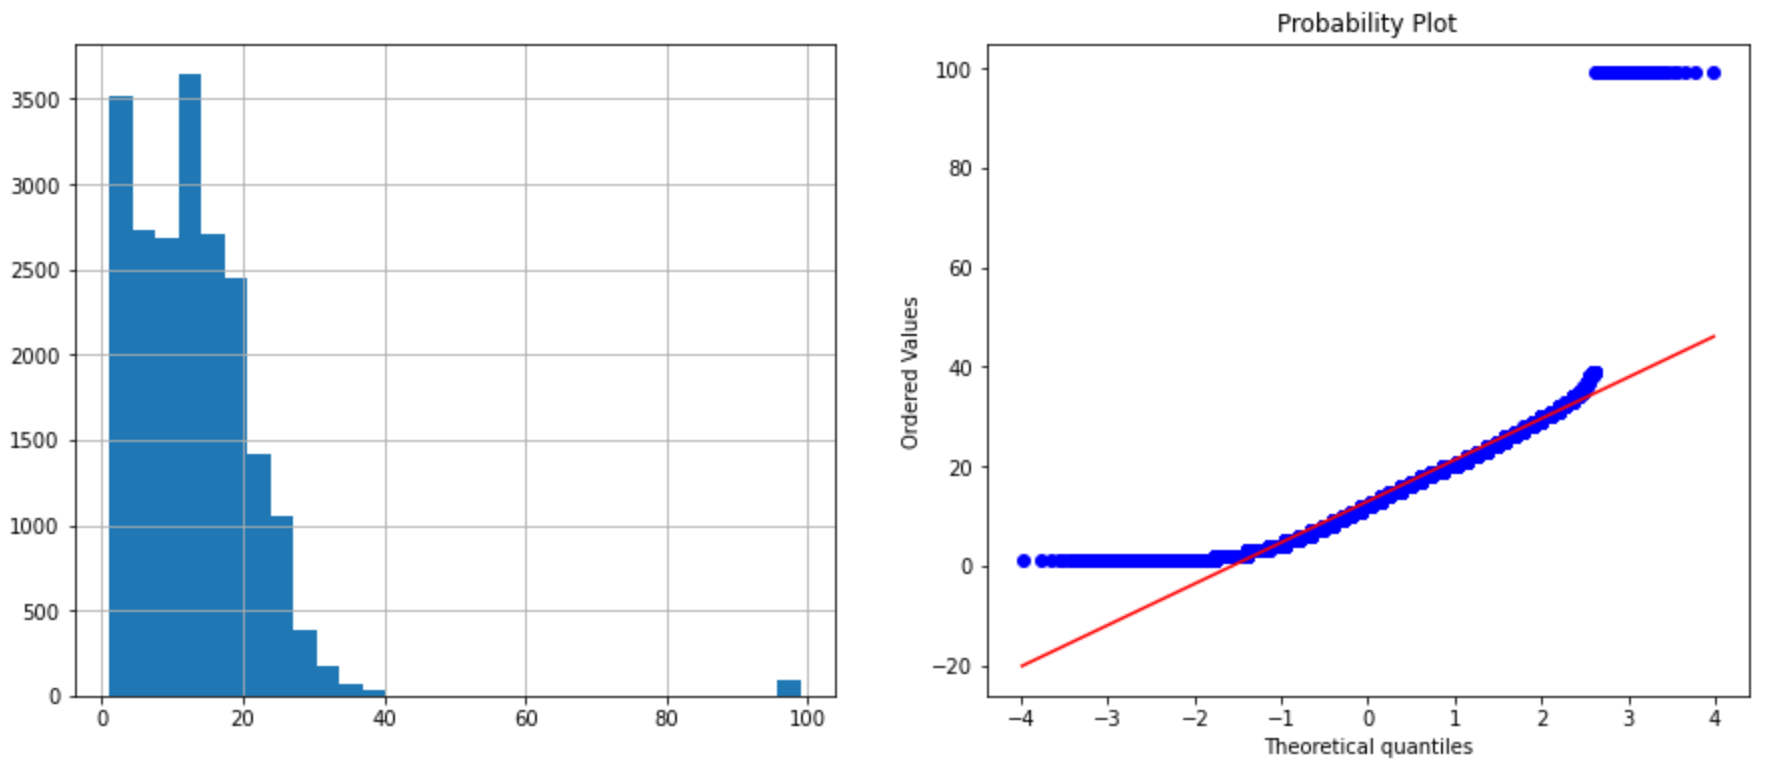

After transformation:
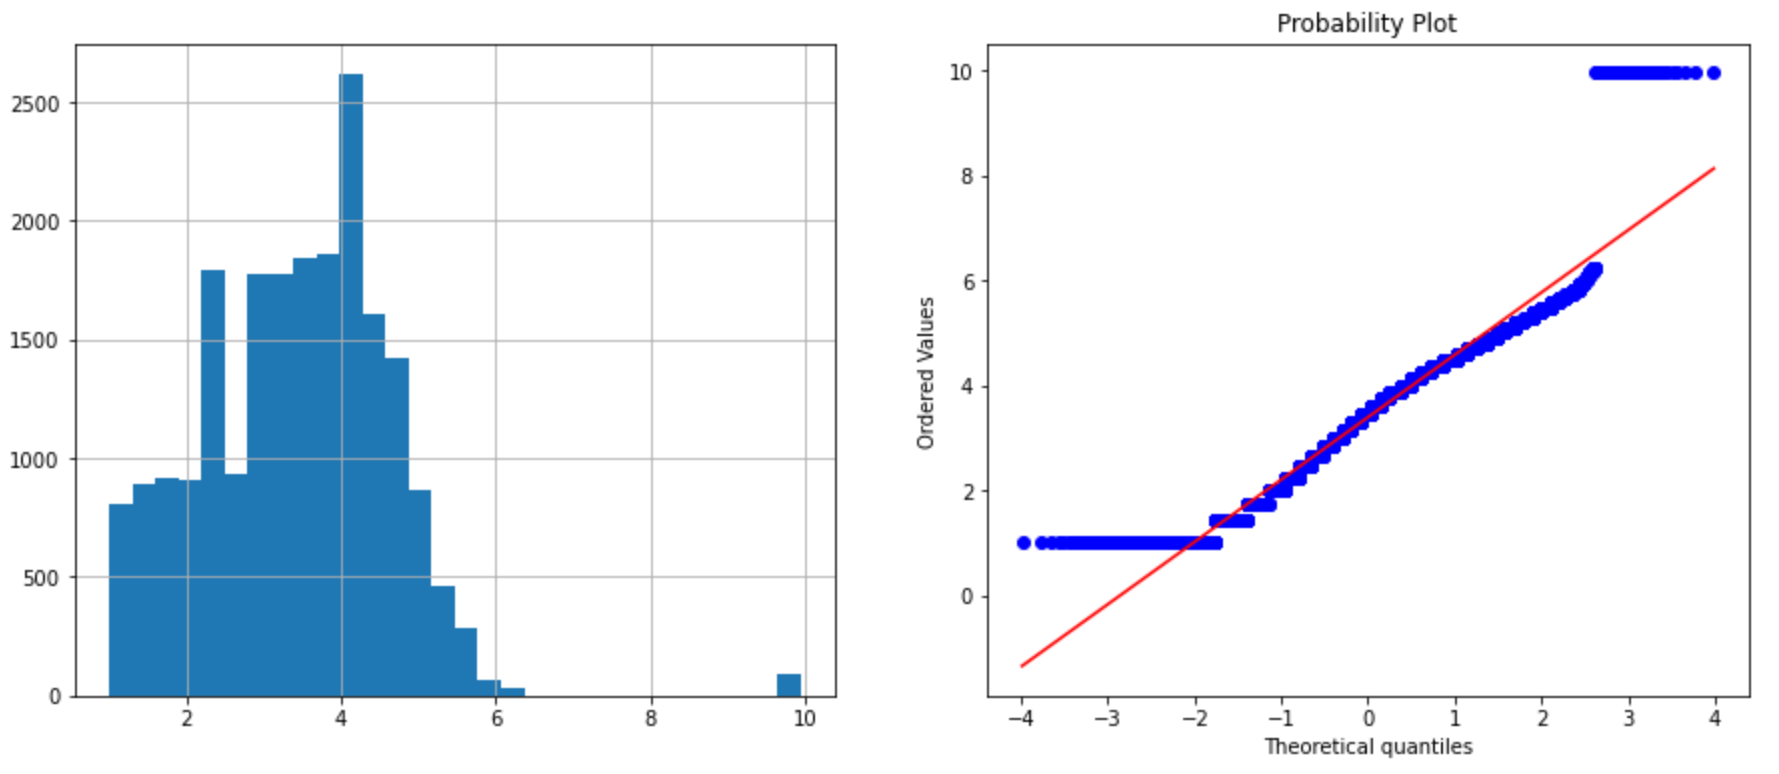

For numerical data encoding, I tried different methods of transformation such as Yeo-Johnson Transformation, Box Cox Transformation and Power Transformation to transform the numerical variable 'positionOrder'. Out of the various transformation methods tried, Power Transformation shows the best representation among the methods used, followed by Yeo-Johnson Transformation, Log Transformation, Reciprocal Transformation and then Box Cox Transformation. 

The target variable 'points' will not be doing transformation as it was dropped in the train test split.

Transformation is not required for numerical variables 'fastest_lap_rank' and 'fastestLapSpeed' as missing value imputation (arbitrary imputation) has been done on the variable. 

The remaining numerical features did not undergo transformation as the before and after transformation of those variables has insignicant differences. 

Transformation will be done for the variable 'positionOrder'. Before transformation, it shows that it is not evenly distributed and follows a right skewed distribution. After transformation, the variable 'positionOrder' is more evenly distributed and closer to a normal distribution as compared to before transformation. 

#### Equal Frequency Discretization

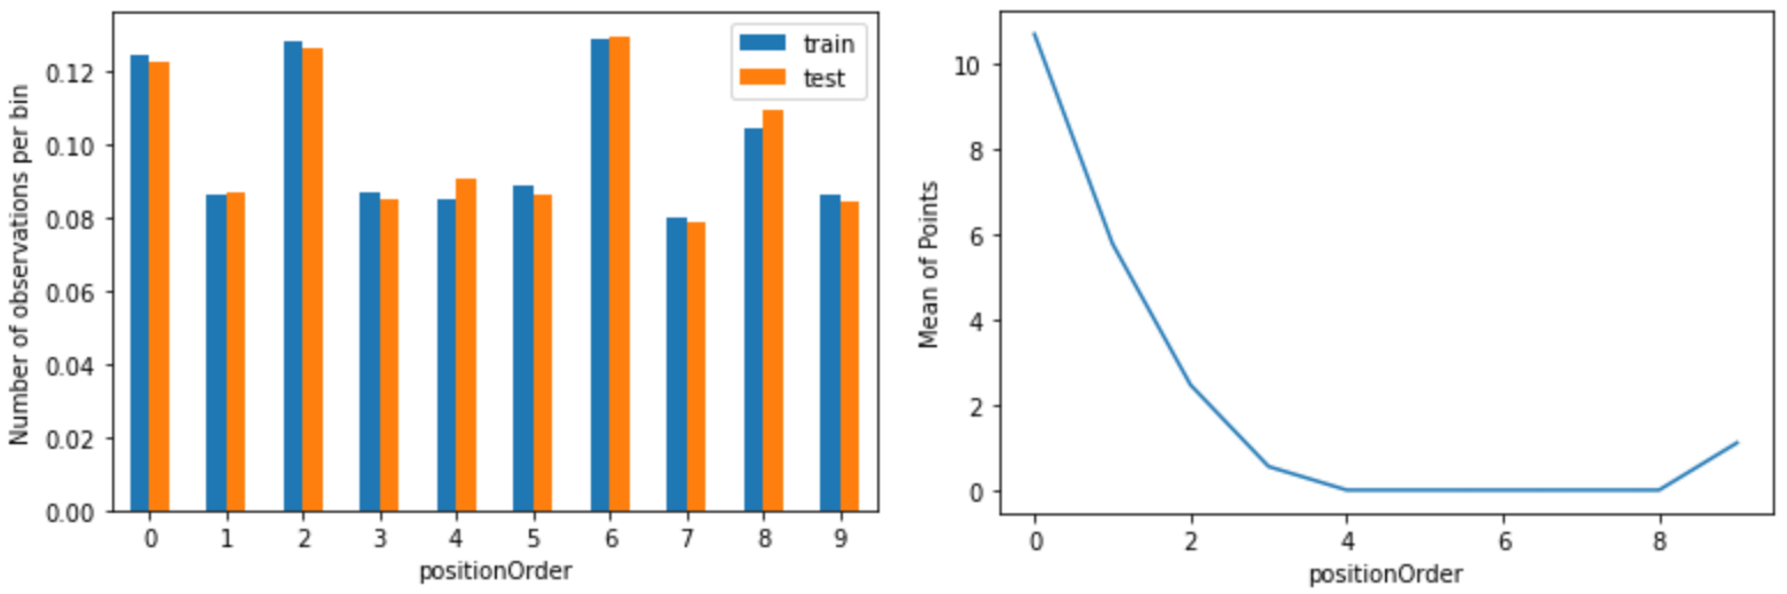

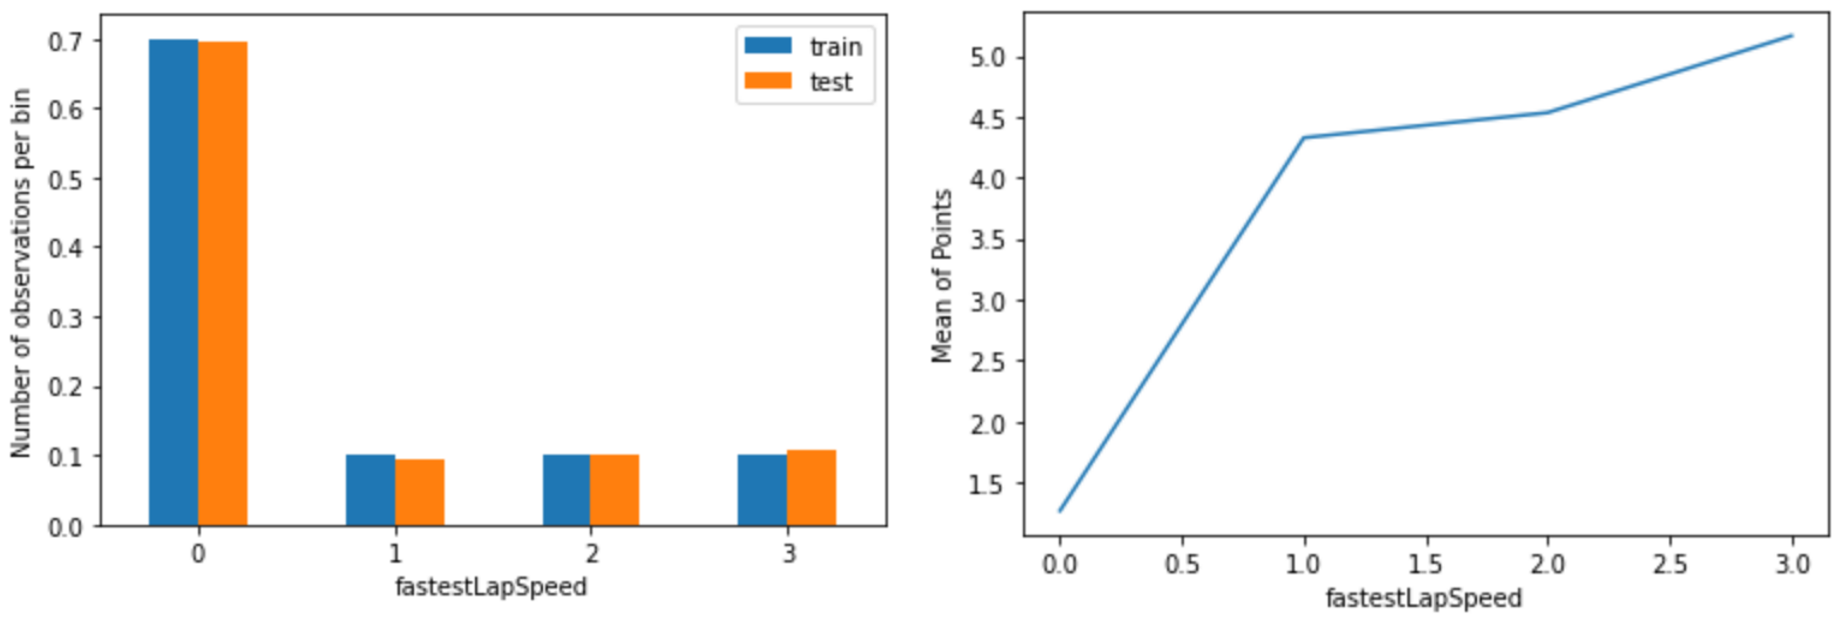

Discretization is needed for the numerical data to transform continous numerical data of a variable to categorical data. I chose 'positionOrder' for discretization. 

I tried different discretization methods such as Equal Frequency Discretization and Equal Width Discretization. Through comparison, Equal Frequency discretization performed better as compared to Equal Width discretization. In Equal Frequency, distribution is more even as compared to Equal Width where it shows an uneven distribution. 

I checked for monotonic relationship between 'positionOrder' and the target variable 'points'. I checked for monotonic relationship between 'fastestLapSpeed' and the target variable 'points'. It shows that there is linear relationship between the two variables and the target variable 'points'. 

### 4.6 Feature Scaling <a id="part4.6"></a>

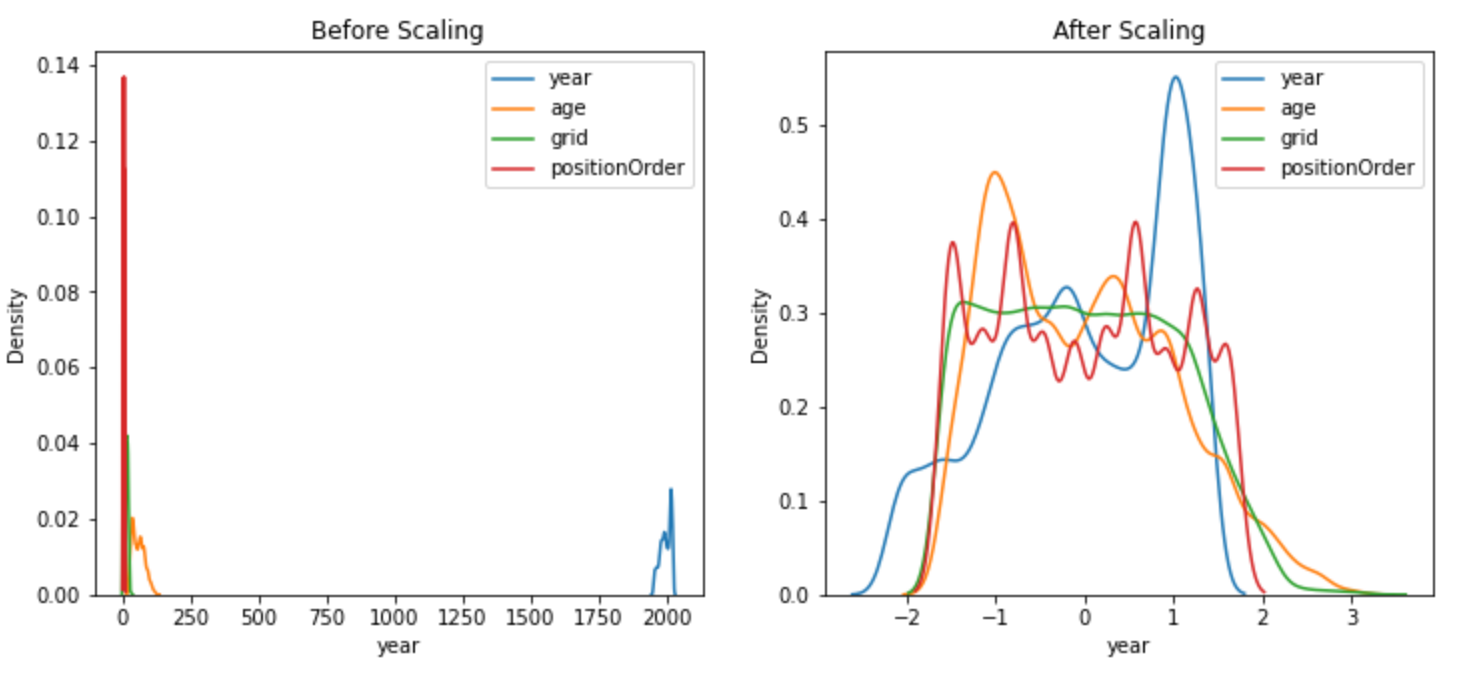

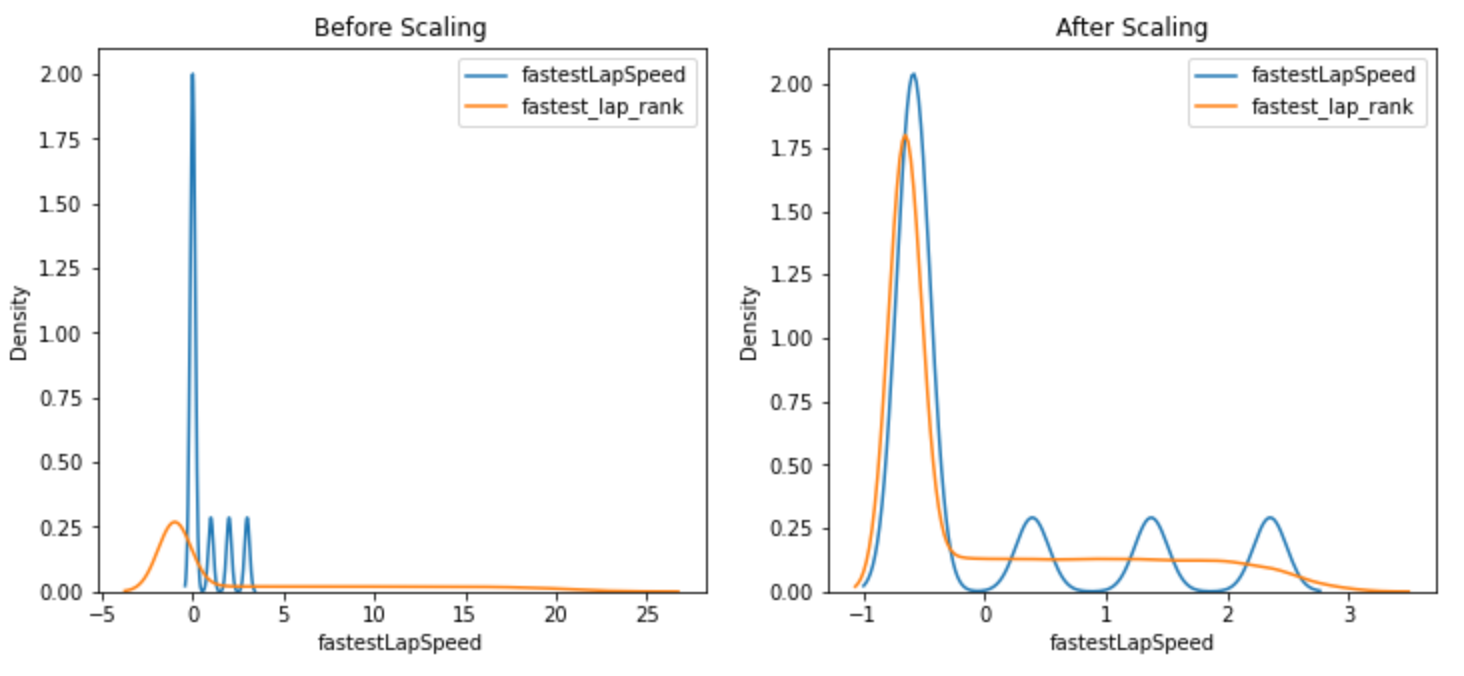

Performing feature scaling is necessary for better comparative analysis as the variables in train and test data have high numerical values. e.g. 'year', 'age', 'grid', 'positionOrder', 'fastestLapSpeed', 'fastest_lap_rank'. Correction of inappropriate values is performed in feature engineer. 

The model would not be accurate as there may be biasness in the algorithm towards the feature with higher values. Therefore, to have a more accurate comparison, the numerical variables will be scaled. 

I tried different scaling methods such as Standardization, MinMax Scaling, Maximum Absolute Scaling and Robust Scaling. Out of all the scaling methods tried, Standardization performed the best. Standardization is the process of centering the variable at zero and standardizing the variance to 1. Standardisation helps in the rescaling of the features to a common scale without distorting the differences in the range of values. 

## 5. Machine Learning Model <a id="part5"></a>

### 5.1 Show Count of Rows and Columns <a id="part5.1"></a>

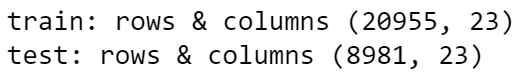

The image above shows the final count of rows and columns for both train and test respectively. Train data has 20955 rows and 23 columns while test data has 8981 rows and 23 columns.

### 5.2 Naïve Baseline Model (Regression) <a id="part5.2"></a>

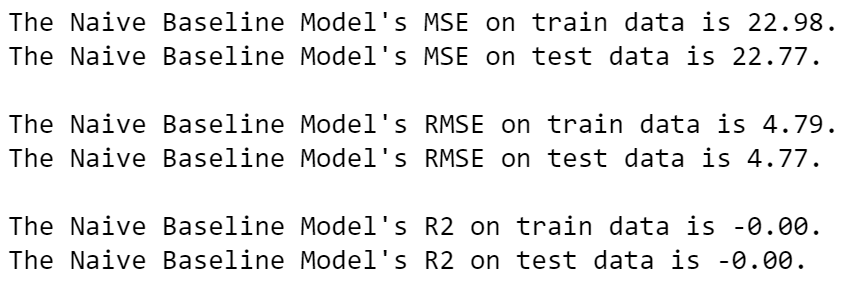

Naïve Baseline Model for Regression is typically mean of Train Target Value predicted for all predictions.

A baseline model serves as benchmarks for trained models. If trained models does not outperform the baseline model, it means that the model's increased complexity does not provide enough benefit. 

The MSE and RMSE for train and test did not perform that well with MSE of 22.98 and 22.77 and RMSE of 4.79 and 4.77. The R2 for train and test data performed badly with a value of -0.00 for both train and test. 

### 5.3 Linear Regression Model <a id="part5.3"></a>

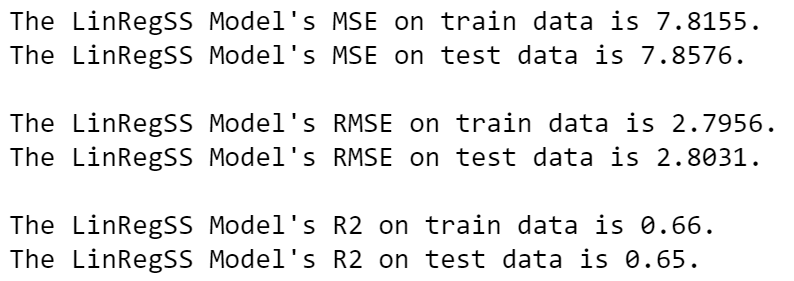

The above shows the result of my linear regression model using Mean Square Error (MSE), Root Mean Square Error (RMSE), as well as R-Square (R2). 

The train and test mse is considerably low at 7.8155 and 7.8576 respectively. The difference between the train mse and test mse is minimal at 0.0421. The train and test rmse is low at 2.7956 and 2.8031 respectively. The difference between train rmse and test rmse is minimal at 0.0075. It is observed that for both the mse and rmse, the test results are slightly higher than the train result. The difference between train R2 and test R2 is minimal at 0.01. 

This indicates that there is minimal difference between the forecasted win rates and actual win rates and that the linear regression is accurate in the prediction of win rates of Formula 1 race.  

## 6. Summary and Further Improvements <a id="part6"></a>

### 6.1 Summarize Findings <a id="part6.1"></a>

- Added new columns -> 'age', 'driver' to represent driver's age and name


- Removed unnecessary columns which would not be useful in the prediction of win rate -> eg. 'number', 'statusId', 'constructorId', 'time', etc. 


- Renamed variable names -> eg. 'name_x' to 'grandprix_name'


- Replaced date with incorrect year in 'date' variable


- Added new column 'year' using dt.year to extract year from 'date'


- Fill in blanks in 'year' based on url given in 'race' table


- 'time_taken' modified to show in '%H:%M:%S' format


- 'q1', 'q2', 'q3' converted to datetime and time extracted using dt.time


- Outliers present in 'points', 'fastestLapSpeed', 'positionOrder' -> outliers not removed


- Train test split (70% train data and 30% test data) -> 'raceId', 'points' dropped


- Arbitrary value imputation for numerical variables 'fastest_lap_rank', 'fastestLapSpeed' with arbitrary value -1


- Missing imputation for categorical variables 'fastestLapTime', 'time_taken', 'pitstop_duration', 'q1', 'q2', 'q3' with 'Missing'


- One Hot Encoding (top categories) -> 'driver'


- Rare Encoding -> 'grandprix_name', 'constructor_name', 'q1', 'q2', 'q3', 'fastestLapTime', 'time_taken', 'pitstop_duration', 'status’, 'driver_nationality'


- Count Encoding -> 'status'


- Ordinal Encoding -> 'grandprix_name', 'constructor_name', 'q1', 'q2', 'q3', 'fastestLapTime', 'time_taken', 'pitstop_duration',  'driver_nationality'


- Power Transformation -> 'positionOrder'


- Equal Frequency Discretization -> 'positionOrder', 'fastestLapSpeed'


- Standardization scaling


- Show count of rows and columns of train and test data


- Naive Baseline Model (Regression)


- Linear Regression Model


- 'resultId' shows a weak positive correlation with target variable 'points' (heatmap)


- 'positionOrder' shows weak negative correlation with target variable 'points' (heatmap)


- 'positionOrder' shows inverse relationship with target variable 'points' (line chart)


- 'fastestLapSpeed' shows monotonic relationship with target variable 'points' (line chart)


- Weak positive and negative correlation between variables

### 6.2 Possible Further Improvements <a id="part6.2"></a>

Amend the Train Test Split ratio to 80:20 by increasing training data to 80% and decreasing testing data to 20%. This could help to improve fit and accuracy of r-sq.

Target variable was not transformed as it was dropped in the train test split. A histogram of the target variable was plotted and it shows a skewed distribution. Since target variable was dropped, it could not perform transformation, therefore remaining as a skewed distribution. Skeweness may result in lower model precision.

Removal of retired drivers as they would not be participating in the Formula 1 race anymore. 

[Back to top (code)](#top)